# CDPv3 Analytics
* event-type
* duck-type errors
* Corruption in MessageIDs
* Stranger Ducks (Anomalies in the DuckIDs)
* Plotting sensor data

In [567]:
# Imports

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from ast import literal_eval

In [596]:
# Plot Settings

COLOR = '#212529'
mpl.rcParams['figure.dpi'] = 256
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
# plt.rc('font', size=10) #controls default text size
# plt.rc('legend', fontsize=10) #fontsize of the legend
# plt.rc('axes', titlesize=16) #fontsize of the title
# plt.rc('axes', labelsize=14) #fontsize of the x and y labels
# plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
# plt.rc('ytick', labelsize=10) #fontsize of the y tick labels

In [221]:
df = pd.read_csv("owlHQ_data.csv", converters={'payload':literal_eval})
df.head()

,papaId,payload,createdAt,eventType
0,OWL_HQ,"{'DeviceID': 'DUCKBMP1', 'MessageID': 'Y3QS', ...",2022-03-01T00:00:04.443,gps
1,OWL_HQ,"{'DeviceID': 'DUCKBMP1', 'MessageID': 'JVUJ', ...",2022-03-01T00:00:17.882,bmp
2,OWL_HQ,"{'DeviceID': 'MAMADUCK', 'MessageID': 'U5TF', ...",2022-03-01T00:00:25.953,health
3,OWL_HQ,"{'DeviceID': 'DUCKBMP1', 'MessageID': '1DDU', ...",2022-03-01T00:01:17.859,bmp
4,OWL_HQ,"{'DeviceID': 'DUCKBMP1', 'MessageID': 'AIOW', ...",2022-03-01T00:02:17.993,bmp


In [222]:
df.shape

(164310, 4)

In [223]:
print(f"The time ranges from {df['createdAt'].min()} -> {df['createdAt'].max()}")

The time ranges from 2022-03-01T00:00:04.443 -> 2022-05-31T23:59:12.493


## Event Types

### What are the different types of eventTypes in our data?

In [224]:
df['eventType'].unique()

array(['gps', 'bmp', 'health', 'pir', 'portal', 'status', 'bmp180',
       'sensor'], dtype=object)

In [225]:
df['eventType'].nunique()

8

In [226]:
event_types = df['eventType'].value_counts()
event_types.head()

health    125660
status      8949
bmp180      8948
gps         7948
pir         7768
Name: eventType, dtype: int64

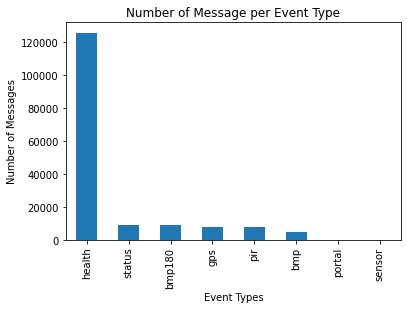

In [227]:
event_types.plot(kind='bar')
plt.title('Number of Message per Event Type')
plt.xlabel('Event Types')
plt.ylabel('Number of Messages');

### Payload

In [230]:
df = pd.concat([df, pd.json_normalize(df['payload'])], axis=1)

In [231]:
df.drop('payload', inplace=True, axis=1)

In [232]:
df.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType
0,OWL_HQ,2022-03-01T00:00:04.443,gps,DUCKBMP1,Y3QS,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2
1,OWL_HQ,2022-03-01T00:00:17.882,bmp,DUCKBMP1,JVUJ,Temp: 27.80 Pres: 102563.00,,1,2
2,OWL_HQ,2022-03-01T00:00:25.953,health,MAMADUCK,U5TF,Counter:7301 Lat:40.73027 Lng:-73.9590 Alt:18....,,1,2
3,OWL_HQ,2022-03-01T00:01:17.859,bmp,DUCKBMP1,1DDU,Temp: 27.80 Pres: 102568.00,,1,2
4,OWL_HQ,2022-03-01T00:02:17.993,bmp,DUCKBMP1,AIOW,Temp: 27.80 Pres: 102567.00,,1,2


* How many unique hops?
* How many duckTypes are there in data?
* How many messages came from each DeviceID (Duck)?

### DuckTypes

In [233]:
df['duckType'].unique()

array([2, '1', 162, 6, 210, 98], dtype=object)

In [234]:
df.loc[df['duckType'] == 162, ]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType
9951,OWL_HQ,2022-03-04T18:45:25.187,bmp180,DUCKBMP1,0TRW,Temp: 29.80 Pres: 103109.00,,2,162


In [235]:
df.loc[df['duckType'] == 6, ]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType
11768,OWL_HQ,2022-03-05T05:00:46.068,status,MAMADUKK,�H78,Counter:554,,4,6


In [236]:
df.loc[df['duckType'] == 210, ]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType
12649,OWL_HQ,2022-03-05T10:15:46.309,status,MAMADUKK,N&IT,Counter:869,,15,210


In [237]:
df.loc[df['duckType'] == 98, ]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType
137074,OWL_HQ,2022-05-11T15:24:33.124,health,IRDUCK01,WOKO,Counter:41590 Charging:0 Full:0 Volts:4108.50 ...,,1,98


In [238]:
df.loc[df['duckType'] == '1', ]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType
7309,OWL_HQ,2022-03-03T21:42:11.48,health,PAPADUCK,bsto,Time Disconnected: 6,PAPADUCK,0,1
7314,OWL_HQ,2022-03-03T21:44:06.166,health,PAPADUCK,7iqr,Time Disconnected: 2,PAPADUCK,0,1
7319,OWL_HQ,2022-03-03T21:44:42.538,health,PAPADUCK,9dco,Time Disconnected: 2,PAPADUCK,0,1
7320,OWL_HQ,2022-03-03T21:44:46.197,health,PAPADUCK,30v0,Time Disconnected: 2,PAPADUCK,0,1
7323,OWL_HQ,2022-03-03T21:45:27.27,health,PAPADUCK,83f5,Time Disconnected: 2,PAPADUCK,0,1
...,...,...,...,...,...,...,...,...,...
164140,OWL_HQ,2022-05-31T21:13:40.121,health,PAPADUCK,e0yk,Packet Fail count: 2615,PAPADUCK,0,1
164188,OWL_HQ,2022-05-31T22:03:40.132,health,PAPADUCK,bivw,Packet Fail count: 2615,PAPADUCK,0,1
164243,OWL_HQ,2022-05-31T22:53:40.173,health,PAPADUCK,y0d5,Packet Fail count: 2615,PAPADUCK,0,1
164278,OWL_HQ,2022-05-31T23:30:14.406,health,PAPADUCK,7n2e,Time Disconnected: 2,PAPADUCK,0,1


### Hops

In [239]:
df['hops'].value_counts()

1     136647
0      26845
2        789
4         18
3         10
15         1
Name: hops, dtype: int64

In [240]:
df['hops'] = df['hops'].astype(int)

In [241]:
df.loc[df['hops']>2,]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType
4393,OWL_HQ,2022-03-02T20:46:21.974,bmp,DUCKBMP1,D07H,Temp: 28.20 Pres: 101329.00,,3,2
6520,OWL_HQ,2022-03-03T16:16:11.748,pir,IRduck01,[U7G,Motion Detected,,3,2
7111,OWL_HQ,2022-03-03T20:42:23.566,bmp,DUCKBMP1,L257,Temp: 28.90 Pres: 101850.00,,3,2
7357,OWL_HQ,2022-03-03T21:48:24.707,status,IRduck01,VDFA,Motion Detected,,3,2
9965,OWL_HQ,2022-03-04T18:57:25.871,bmp180,DUCKBMP1,V297,Temp: 29.90 Pres: 103094.00,,3,2
10218,OWL_HQ,2022-03-04T20:21:45.85,status,MAMADUKK,�P5M,Counter:35,,4,2
10287,OWL_HQ,2022-03-04T20:43:45.859,status,MAMADUKK,T���,Counter:57,,4,2
10382,OWL_HQ,2022-03-04T21:11:45.637,status,MAMADUKK,�;59,Counter:85,,4,2
10461,OWL_HQ,2022-03-04T21:33:45.923,status,MAMADUKK,WX��,Counter:107,,4,2
11201,OWL_HQ,2022-03-05T01:38:46.175,status,MAMADUKK,K@KZ,Counter:352,,4,2


### DeviceIDs (Ducks)

In [242]:
df['DeviceID'].unique()

array(['DUCKBMP1', 'MAMADUCK', 'IRduck01', '�u!�O��1', 'TODAY001',
       'MAMA0001', 'PAPADUCK', '"3<@BMP1', 'NqMADUCK', 'DUC[BMP1',
       'MAMADUKK', 'ARduck01', 'IRduc�01', 'IRd�kk�1', 'MAMADUKC',
       'MAMA0002', '03MADUCK', 'MLMADUKK', 'MAMADUK�', 'HEALTHDK',
       'IRDUCK01', 'I�UCK09'], dtype=object)

In [243]:
def corrupted_device(row):
    if '�' in row:
        return 1
    else:
        return 0

In [244]:
df['corrupted_device'] = df['DeviceID'].apply(corrupted_device)

In [245]:
df.loc[df['corrupted_device']==1,]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device
1204,OWL_HQ,2022-03-01T12:49:18.865,bmp,�u!�O��1,4EZZ,Temp: 23.30 Pres: 102371.00,,2,2,1
12303,OWL_HQ,2022-03-05T08:10:40.976,gps,IRduc�01,77AR,Lat:40.73012 Lng:-73.9590 Alt:5.40,,1,2,1
16338,OWL_HQ,2022-03-06T11:34:43.658,gps,IRd�kk�1,FIRR,Lat:40.73014 Lng:-73.9590 Alt:25.80,,1,2,1
29263,OWL_HQ,2022-03-09T22:51:53.676,status,MAMADUK�,U7LT,Counter:7385,,2,2,1
79079,OWL_HQ,2022-03-28T18:48:54.98,pir,I�UCK09,B]QH,Motion Detected,,2,2,1


In [246]:
print(f"Percent corruption in DeviceID {(5/145481)*100}%")

Percent corruption in DeviceID 0.0034368749183742203%


In [263]:
office_ducks = ['DUCKBMP1', 'PAPADUCK', 'HEALTHDK', 'IRDUCK01',
                'IRduck01', '"3<@BMP1', 'DUC[BMP1', 'ARduck01',
                'IRduc�01', 'IRd�kk�1', 'I�UCK09']

In [250]:
corrupted_office_ducks = [
    '"3<@BMP1', 'DUC[BMP1', 'ARduck01',
    'IRduc�01', 'IRd�kk�1', 'I�UCK09'
]

In [251]:
df.loc[df['DeviceID'].isin(corrupted_office_ducks),]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device
7691,OWL_HQ,2022-03-03T23:27:23.818,bmp180,"""3<@BMP1",63LQ,Temp: 28.20 Pres: 102332.00,,1,2,0
8369,OWL_HQ,2022-03-04T05:30:06.935,gps,DUC[BMP1,0IRW,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
11461,OWL_HQ,2022-03-05T03:10:40.928,gps,ARduck01,W48L,Lat:40.73012 Lng:-73.9590 Alt:12.40,,1,2,0
12303,OWL_HQ,2022-03-05T08:10:40.976,gps,IRduc�01,77AR,Lat:40.73012 Lng:-73.9590 Alt:5.40,,1,2,1
16338,OWL_HQ,2022-03-06T11:34:43.658,gps,IRd�kk�1,FIRR,Lat:40.73014 Lng:-73.9590 Alt:25.80,,1,2,1
79079,OWL_HQ,2022-03-28T18:48:54.98,pir,I�UCK09,B]QH,Motion Detected,,2,2,1


In [248]:
df = df.loc[df['DeviceID'].isin(office_ducks),]

In [264]:
temp = df.copy()
# temp.loc[temp['DeviceID'].isin(corrupted_office_ducks),'DeviceID'] = 'Corrupted' 
temp.loc[temp['DeviceID'] == 'IRduck01','DeviceID'] = 'IRDUCK01'
temp.loc[temp['DeviceID'] == 'IRd�kk�1','DeviceID'] = 'IRDUCK01'
temp.loc[temp['DeviceID'] == 'I�UCK09','DeviceID'] = 'IRDUCK01'
temp.loc[temp['DeviceID'] == 'IRduc�01','DeviceID'] = 'IRDUCK01'
temp.loc[temp['DeviceID'] == 'ARduck01','DeviceID'] = 'IRDUCK01'
temp.loc[temp['DeviceID'] == 'DUC[BMP1','DeviceID'] = 'DUCKBMP1'
temp.loc[temp['DeviceID'] == '"3<@BMP1','DeviceID'] = 'DUCKBMP1'

In [269]:
temp.groupby(['DeviceID'])['MessageID'].count().sort_values()

DeviceID
DUCKBMP1    16795
PAPADUCK    26845
HEALTHDK    47761
IRDUCK01    57829
Name: MessageID, dtype: int64

In [313]:
def plot_clean_bar_graph(df, title):
    
    df.plot(kind='bar', color='#212529')
    plt.title(title)
    
    # Removes the border
    for pos in ['right', 'top', 'bottom', 'left']:
        plt.gca().spines[pos].set_visible(False)
        
    plt.xticks(rotation=0)
    
    # Removes the little ticks on x axis
    plt.tick_params(axis='both', which='both', length=0)
    
    # Removes the y-axis
    plt.gca().get_yaxis().set_visible(False)
    
    # Plots the y-value for each bar
    for i in range(len(t)):
        plt.text(i, t[i]-4000, t[i], ha = 'center', color='w', fontsize=10)
    
    plt.tight_layout();

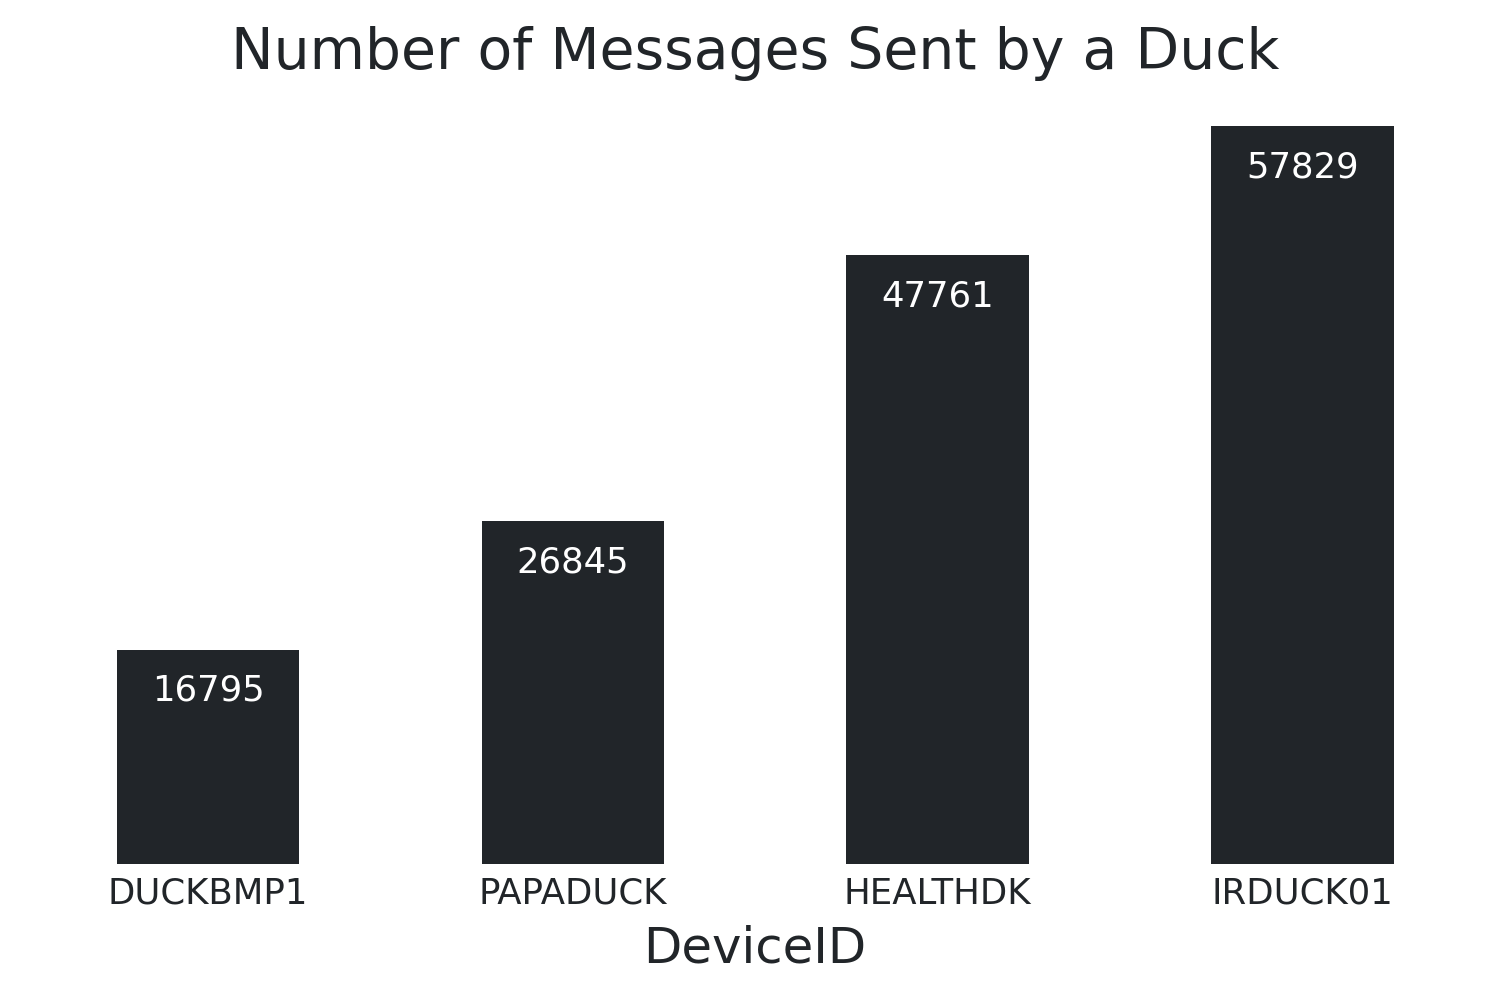

In [585]:
t = temp.groupby(['DeviceID'])['MessageID'].count().sort_values()
t.plot(kind='bar', color='#212529')
plt.title("Number of Messages Sent by a Duck")
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.gca().get_yaxis().set_visible(False)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
for i in range(len(t)):
    plt.text(i, t[i]-4000, t[i], ha = 'center', color='w', fontsize=10)
plt.tick_params(axis='both', which='both', length=0)
plt.tight_layout();

In [325]:
df['eventType'].value_counts().sort_values()

status        41
bmp         5034
pir         7768
gps         7947
bmp180      8948
health    119492
Name: eventType, dtype: int64

In [701]:
event_counts = df['eventType'].value_counts().sort_values()
event_counts.index = [event.upper() for event in event_counts.index]
event_counts.index

Index(['STATUS', 'PIR', 'GPS', 'BMP180', 'HEALTH'], dtype='object')

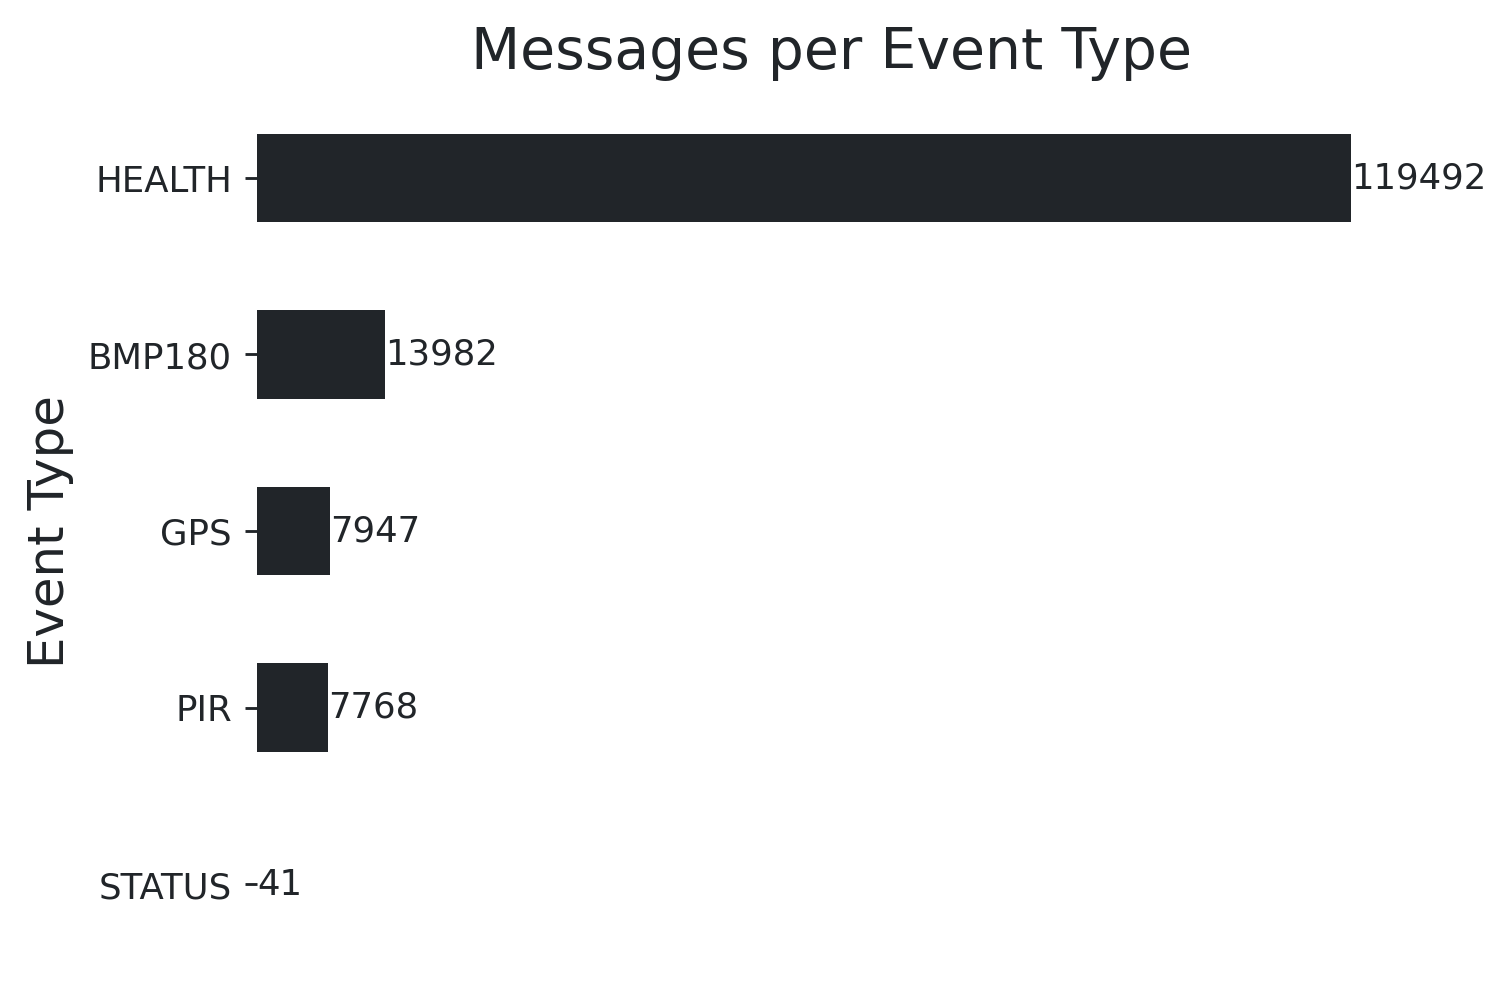

In [702]:
event_counts.plot(kind='barh', color='#212529')
plt.title('Messages per Event Type')
plt.ylabel('Event Type')
for i, v in enumerate(event_counts):
    plt.text(v+50, i, str(round(v, 2)), color='#212529', va="center")
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.gca().axes.xaxis.set_visible(False)
plt.tight_layout();

In [641]:
from matplotlib import colors

cmap = colors.ListedColormap(['#212529'], N=4)
# colors.LinearSegmentedColormap.from_list("", ["#212529"])
plt.pie(event_counts, labels=event_counts.index, colors=plt.get_cmap('gnuplot2')(np.arange(1,6)*20)[::-1]);

## GPS

In [144]:
gps = df.loc[df['eventType']=='gps',].reset_index(drop=True)
gps.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device
0,OWL_HQ,2022-03-01 0:00:04,gps,DUCKBMP1,Y3QS,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
1,OWL_HQ,2022-03-01 0:06:05,gps,DUCKBMP1,NJ56,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
2,OWL_HQ,2022-03-01 0:12:04,gps,DUCKBMP1,31TE,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
3,OWL_HQ,2022-03-01 0:18:05,gps,DUCKBMP1,STT3,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
4,OWL_HQ,2022-03-01 0:24:05,gps,DUCKBMP1,B9CJ,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0


In [145]:
t = pd.DataFrame(gps['Payload'].str.split(" ").to_list(), columns = ['latitude', 'longitude', 'altitude'])

In [146]:
gps.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device
0,OWL_HQ,2022-03-01 0:00:04,gps,DUCKBMP1,Y3QS,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
1,OWL_HQ,2022-03-01 0:06:05,gps,DUCKBMP1,NJ56,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
2,OWL_HQ,2022-03-01 0:12:04,gps,DUCKBMP1,31TE,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
3,OWL_HQ,2022-03-01 0:18:05,gps,DUCKBMP1,STT3,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0
4,OWL_HQ,2022-03-01 0:24:05,gps,DUCKBMP1,B9CJ,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0


In [147]:
gps = pd.concat([gps, t], axis=1)

In [148]:
gps.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,latitude,longitude,altitude
0,OWL_HQ,2022-03-01 0:00:04,gps,DUCKBMP1,Y3QS,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0,Lat:0.00000,Lng:0.0000,Alt:0.00
1,OWL_HQ,2022-03-01 0:06:05,gps,DUCKBMP1,NJ56,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0,Lat:0.00000,Lng:0.0000,Alt:0.00
2,OWL_HQ,2022-03-01 0:12:04,gps,DUCKBMP1,31TE,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0,Lat:0.00000,Lng:0.0000,Alt:0.00
3,OWL_HQ,2022-03-01 0:18:05,gps,DUCKBMP1,STT3,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0,Lat:0.00000,Lng:0.0000,Alt:0.00
4,OWL_HQ,2022-03-01 0:24:05,gps,DUCKBMP1,B9CJ,Lat:0.00000 Lng:0.0000 Alt:0.00,,1,2,0,Lat:0.00000,Lng:0.0000,Alt:0.00


In [149]:
# Extracting the latitude and longitude from columns

gps['latitude'] = pd.DataFrame(gps['latitude'].str.split(":").to_list(), columns = ['str', 'latitude'])['latitude'].astype('float')
gps['longitude'] = pd.DataFrame(gps['longitude'].str.split(":").to_list(), columns = ['str', 'longitude'])['longitude'].astype('float')

In [150]:
gps.groupby('DeviceID')['latitude'].max()

DeviceID
DUCKBMP1     0.00000
HEALTHDK     0.00000
IRDUCK01    40.73057
Name: latitude, dtype: float64

In [151]:
gps.groupby('DeviceID')['longitude'].max()

DeviceID
DUCKBMP1     0.0000
HEALTHDK     0.0000
IRDUCK01   -73.9586
Name: longitude, dtype: float64

In [152]:
df['corrupted_message'] = df['MessageID'].apply(corrupted_device)

In [153]:
df.loc[df['corrupted_message']==1,]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,corrupted_message
2996,OWL_HQ,2022-03-02 6:55:21,bmp,DUCKBMP1,Z7F�,Temp: 24.10 Pres: 101226.00,,2,2,0,1
7841,OWL_HQ,2022-03-04 0:38:24,bmp180,DUCKBMP1,\C��,Temp: 27.70 Pres: 102531.00,,1,2,0,1
8016,OWL_HQ,2022-03-04 2:14:24,status,DUCKBMP1,I7*�,Temp: 26.60 Pres: 102779.00,,1,2,0,1
33844,OWL_HQ,2022-03-11 20:58:46,health,IRDUCK01,�9Q0,Counter:672Charging:1 Full:0 Volts:-3.00 Temp:...,,2,2,0,1
73751,OWL_HQ,2022-03-24 21:48:25,pir,IRDUCK01,GU2�,Motion Detected,,1,2,0,1
89438,OWL_HQ,2022-04-05 5:03:54,status,IRDUCK01,S�-I,Counter:15360 Charging:0 Full:0 Volts:4117.30 ...,,2,2,0,1
97924,OWL_HQ,2022-04-10 22:52:04,gps,DUCKBMP1,0IV�,Lat:0.00000 Lng:0.0000 Alt:0.00,,2,2,0,1


In [154]:
print(f"Percent corruption in MessageID {(7/145481)*100}%")

Percent corruption in MessageID 0.004811624885723909%


Be able to detect corrupted messages, if corrupted, request another message

In [328]:
df.loc[df['eventType']=='bmp','eventType'] = 'bmp180'
# bmp = df.loc[df['eventType']=='bmp',].copy()
bmp180 = df.loc[df['eventType']=='bmp180',].copy()

In [329]:
bmp180.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device
1,OWL_HQ,2022-03-01T00:00:17.882,bmp180,DUCKBMP1,JVUJ,Temp: 27.80 Pres: 102563.00,,1,2,0
3,OWL_HQ,2022-03-01T00:01:17.859,bmp180,DUCKBMP1,1DDU,Temp: 27.80 Pres: 102568.00,,1,2,0
4,OWL_HQ,2022-03-01T00:02:17.993,bmp180,DUCKBMP1,AIOW,Temp: 27.80 Pres: 102567.00,,1,2,0
6,OWL_HQ,2022-03-01T00:03:18.443,bmp180,DUCKBMP1,95KQ,Temp: 27.80 Pres: 102572.00,,1,2,0
7,OWL_HQ,2022-03-01T00:04:17.778,bmp180,DUCKBMP1,VTXD,Temp: 27.80 Pres: 102574.00,,1,2,0


In [332]:
sample = bmp180['Payload'].str.split("Pres:").apply(pd.Series)

In [344]:
bmp180['temperature'] = sample[0].str.split("Temp:").apply(pd.Series)[1].str.strip().astype(float)

In [343]:
bmp180['pressure'] = sample[1].str.strip().astype(float)

In [345]:
bmp180.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,temperature,pressure
1,OWL_HQ,2022-03-01T00:00:17.882,bmp180,DUCKBMP1,JVUJ,Temp: 27.80 Pres: 102563.00,,1,2,0,27.8,102563.0
3,OWL_HQ,2022-03-01T00:01:17.859,bmp180,DUCKBMP1,1DDU,Temp: 27.80 Pres: 102568.00,,1,2,0,27.8,102568.0
4,OWL_HQ,2022-03-01T00:02:17.993,bmp180,DUCKBMP1,AIOW,Temp: 27.80 Pres: 102567.00,,1,2,0,27.8,102567.0
6,OWL_HQ,2022-03-01T00:03:18.443,bmp180,DUCKBMP1,95KQ,Temp: 27.80 Pres: 102572.00,,1,2,0,27.8,102572.0
7,OWL_HQ,2022-03-01T00:04:17.778,bmp180,DUCKBMP1,VTXD,Temp: 27.80 Pres: 102574.00,,1,2,0,27.8,102574.0


In [352]:
bmp180['createdAt'] = pd.to_datetime(bmp180['createdAt'])

In [355]:
bmp180['date'] = bmp180['createdAt'].dt.date

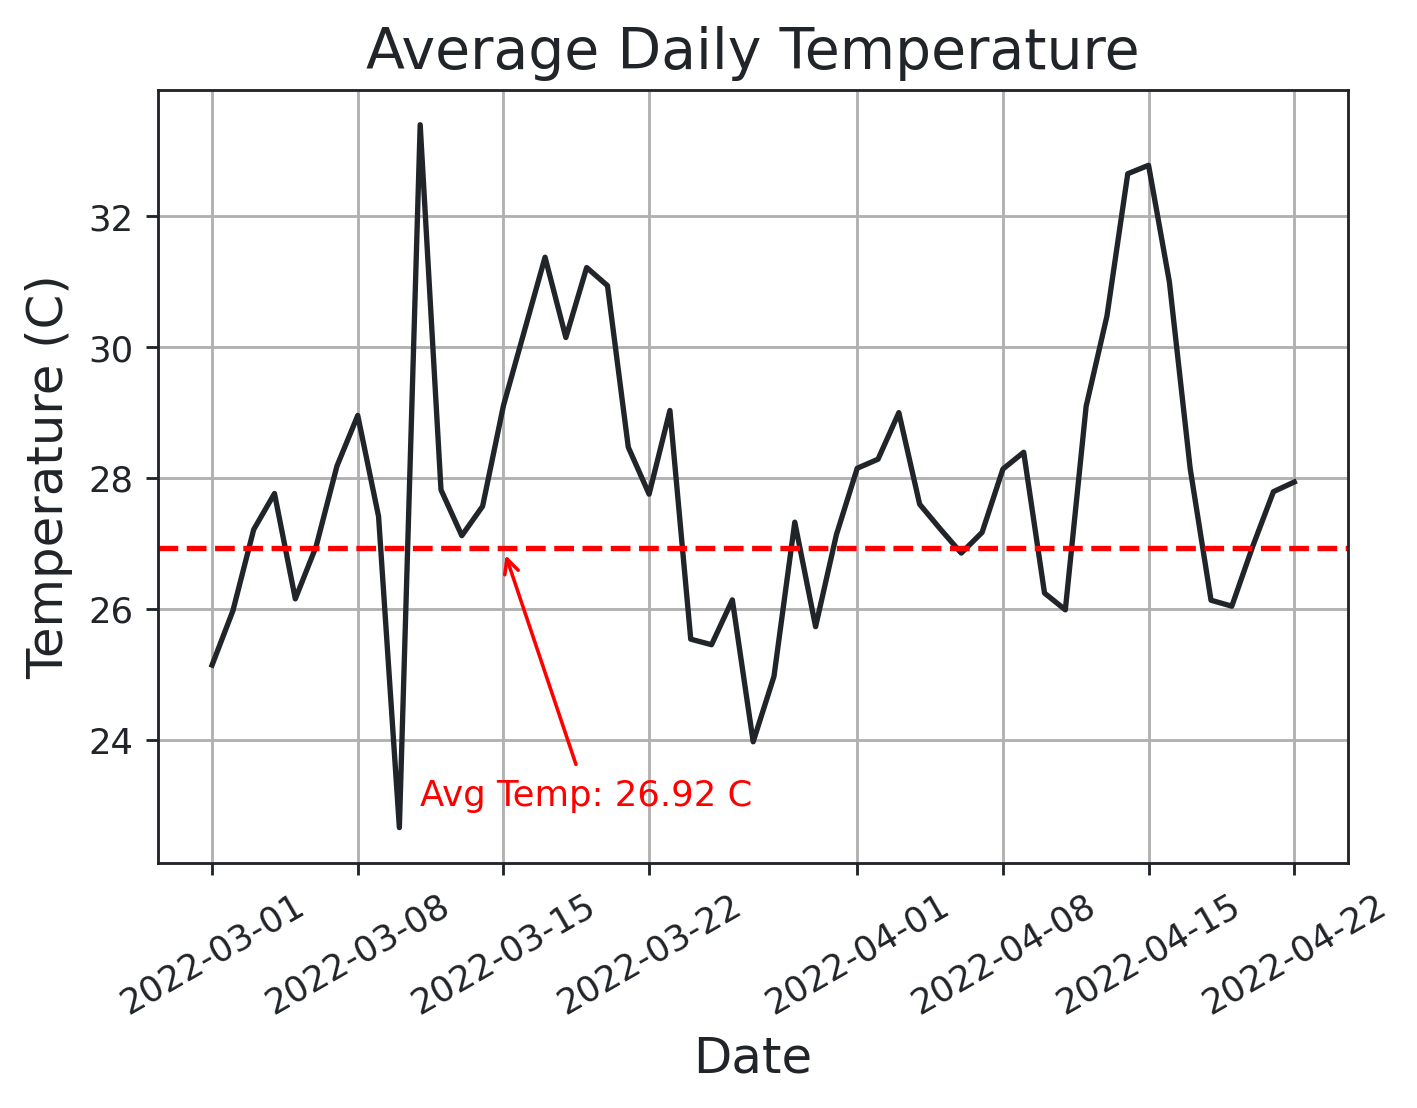

In [598]:
fig, ax = plt.subplots()
bmp180.groupby('date')['temperature'].mean().plot(label='Daily Temperature', ax=ax, color='#212529')
plt.grid()
plt.title("Average Daily Temperature")
plt.axhline(bmp180['temperature'].mean(), color='r', linestyle='--', label=f"Avg Temp: {bmp180['temperature'].mean():.2f} C")
plt.xticks(rotation=30)
plt.xlabel('Date')
ax.annotate(
    f"Avg Temp: {bmp180['temperature'].mean():.2f} C", 
    xy=('2022-03-15', bmp180['temperature'].mean()), xytext=('2022-03-11', 23),
    color='red',
    arrowprops=dict(arrowstyle="->", color='red'),
)
plt.ylabel("Temperature (C)");
# plt.legend()

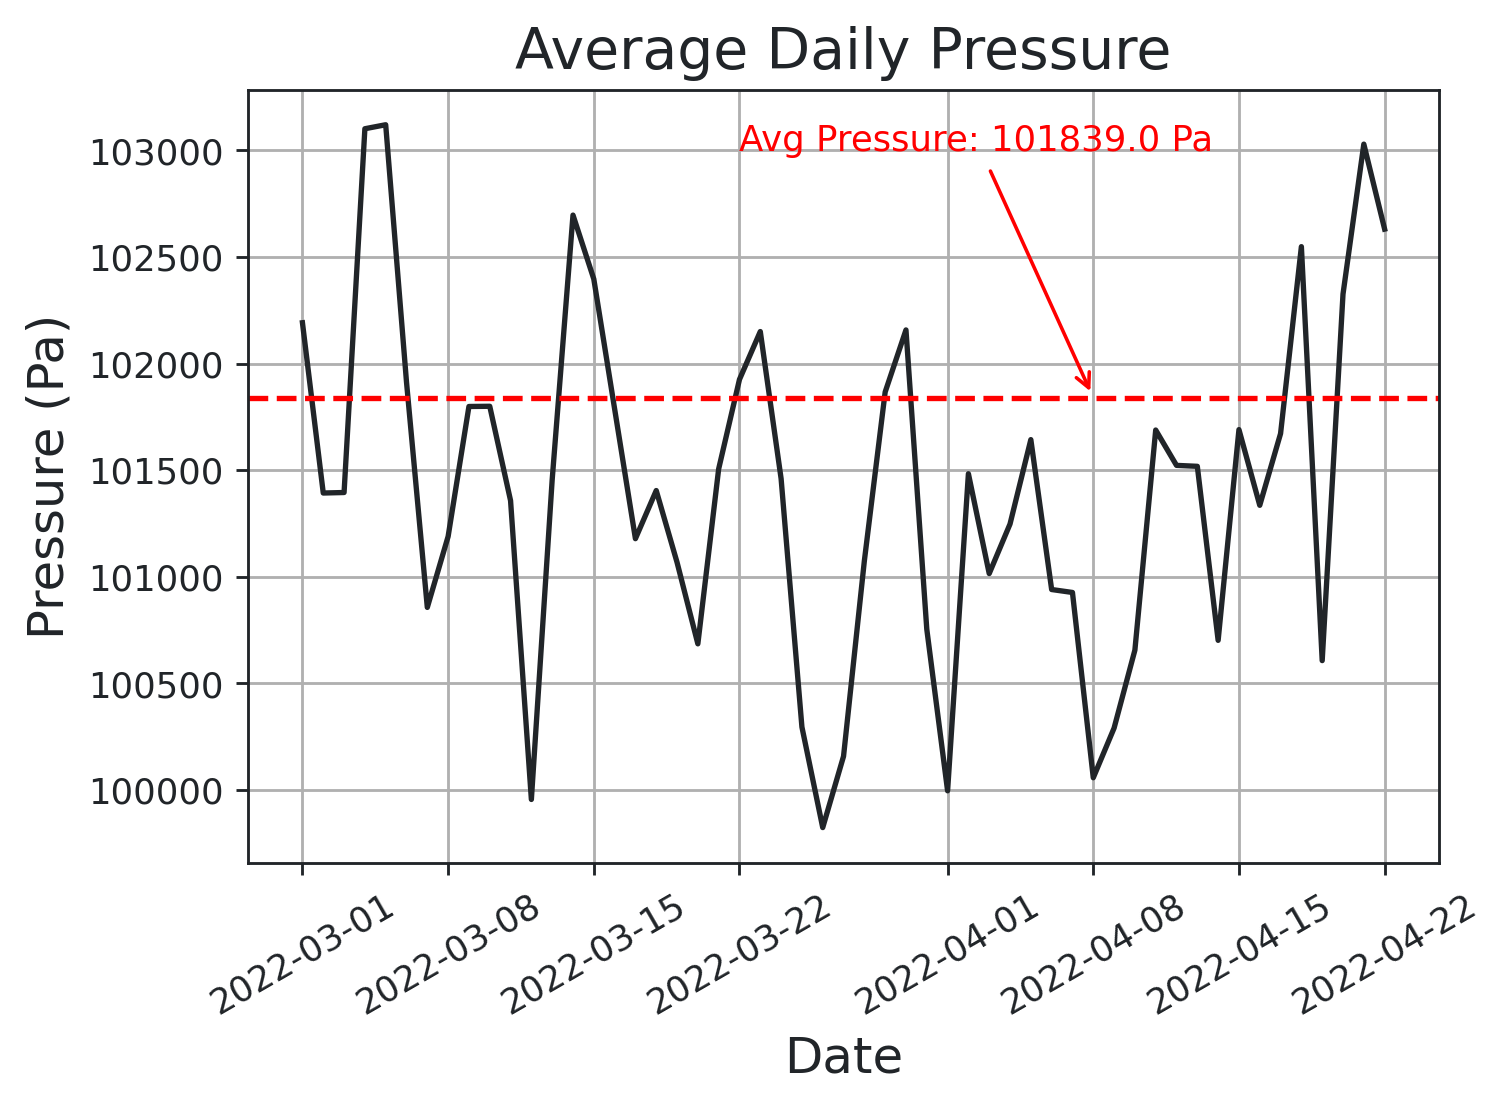

In [599]:
fig, ax = plt.subplots()
bmp180.groupby('date')['pressure'].mean().plot(label='Daily Temperature', ax=ax, color='#212529')
plt.grid()
plt.title("Average Daily Pressure")
plt.axhline(bmp180['pressure'].mean(), color='r', linestyle='--', label=f"Avg Temp: {bmp180['pressure'].mean():1f} Pa")
plt.xticks(rotation=30)
plt.xlabel('Date')
ax.annotate(
    f"Avg Pressure: {np.round(bmp180['pressure'].mean())} Pa", 
    xy=('2022-04-08', bmp180['pressure'].mean()), xytext=('2022-03-22', 103000),
    color='red',
    arrowprops=dict(arrowstyle="->", color='red'),
)
plt.ylabel("Pressure (Pa)");

In [165]:
def check_for_float(row):
    try:
        return float(row)
    except:
        return -99

In [608]:
def get_time(df):
    df = df.copy()
    df['createdAt'] = pd.to_datetime(df['createdAt'])
    df['date'] = df['createdAt'].dt.date
    df['time'] = df['createdAt'].dt.time
    df['hour'] = df['createdAt'].dt.hour 
    return df

### IR

In [406]:
ir = df.loc[df['eventType']=='pir',].copy()
ir.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device
18,OWL_HQ,2022-03-01T00:09:48.396,pir,IRduck01,PRXN,Motion Detected,,1,2,0
19,OWL_HQ,2022-03-01T00:10:03.022,pir,IRduck01,US8O,Motion Detected,,1,2,0
1503,OWL_HQ,2022-03-01T15:41:50.954,pir,IRduck01,CH83,Motion Detected,,1,2,0
1514,OWL_HQ,2022-03-01T15:46:40.198,pir,IRduck01,SBH0,Motion Detected,,1,2,0
1516,OWL_HQ,2022-03-01T15:47:29.429,pir,IRduck01,9Q8H,Motion Detected,,1,2,0


In [413]:
ir['createdAt'] = pd.to_datetime(ir['createdAt']) - pd.Timedelta(6, 'h')

In [414]:
ir['time'] = ir['createdAt'].dt.time

In [415]:
ir['hour'] = ir['createdAt'].dt.hour 

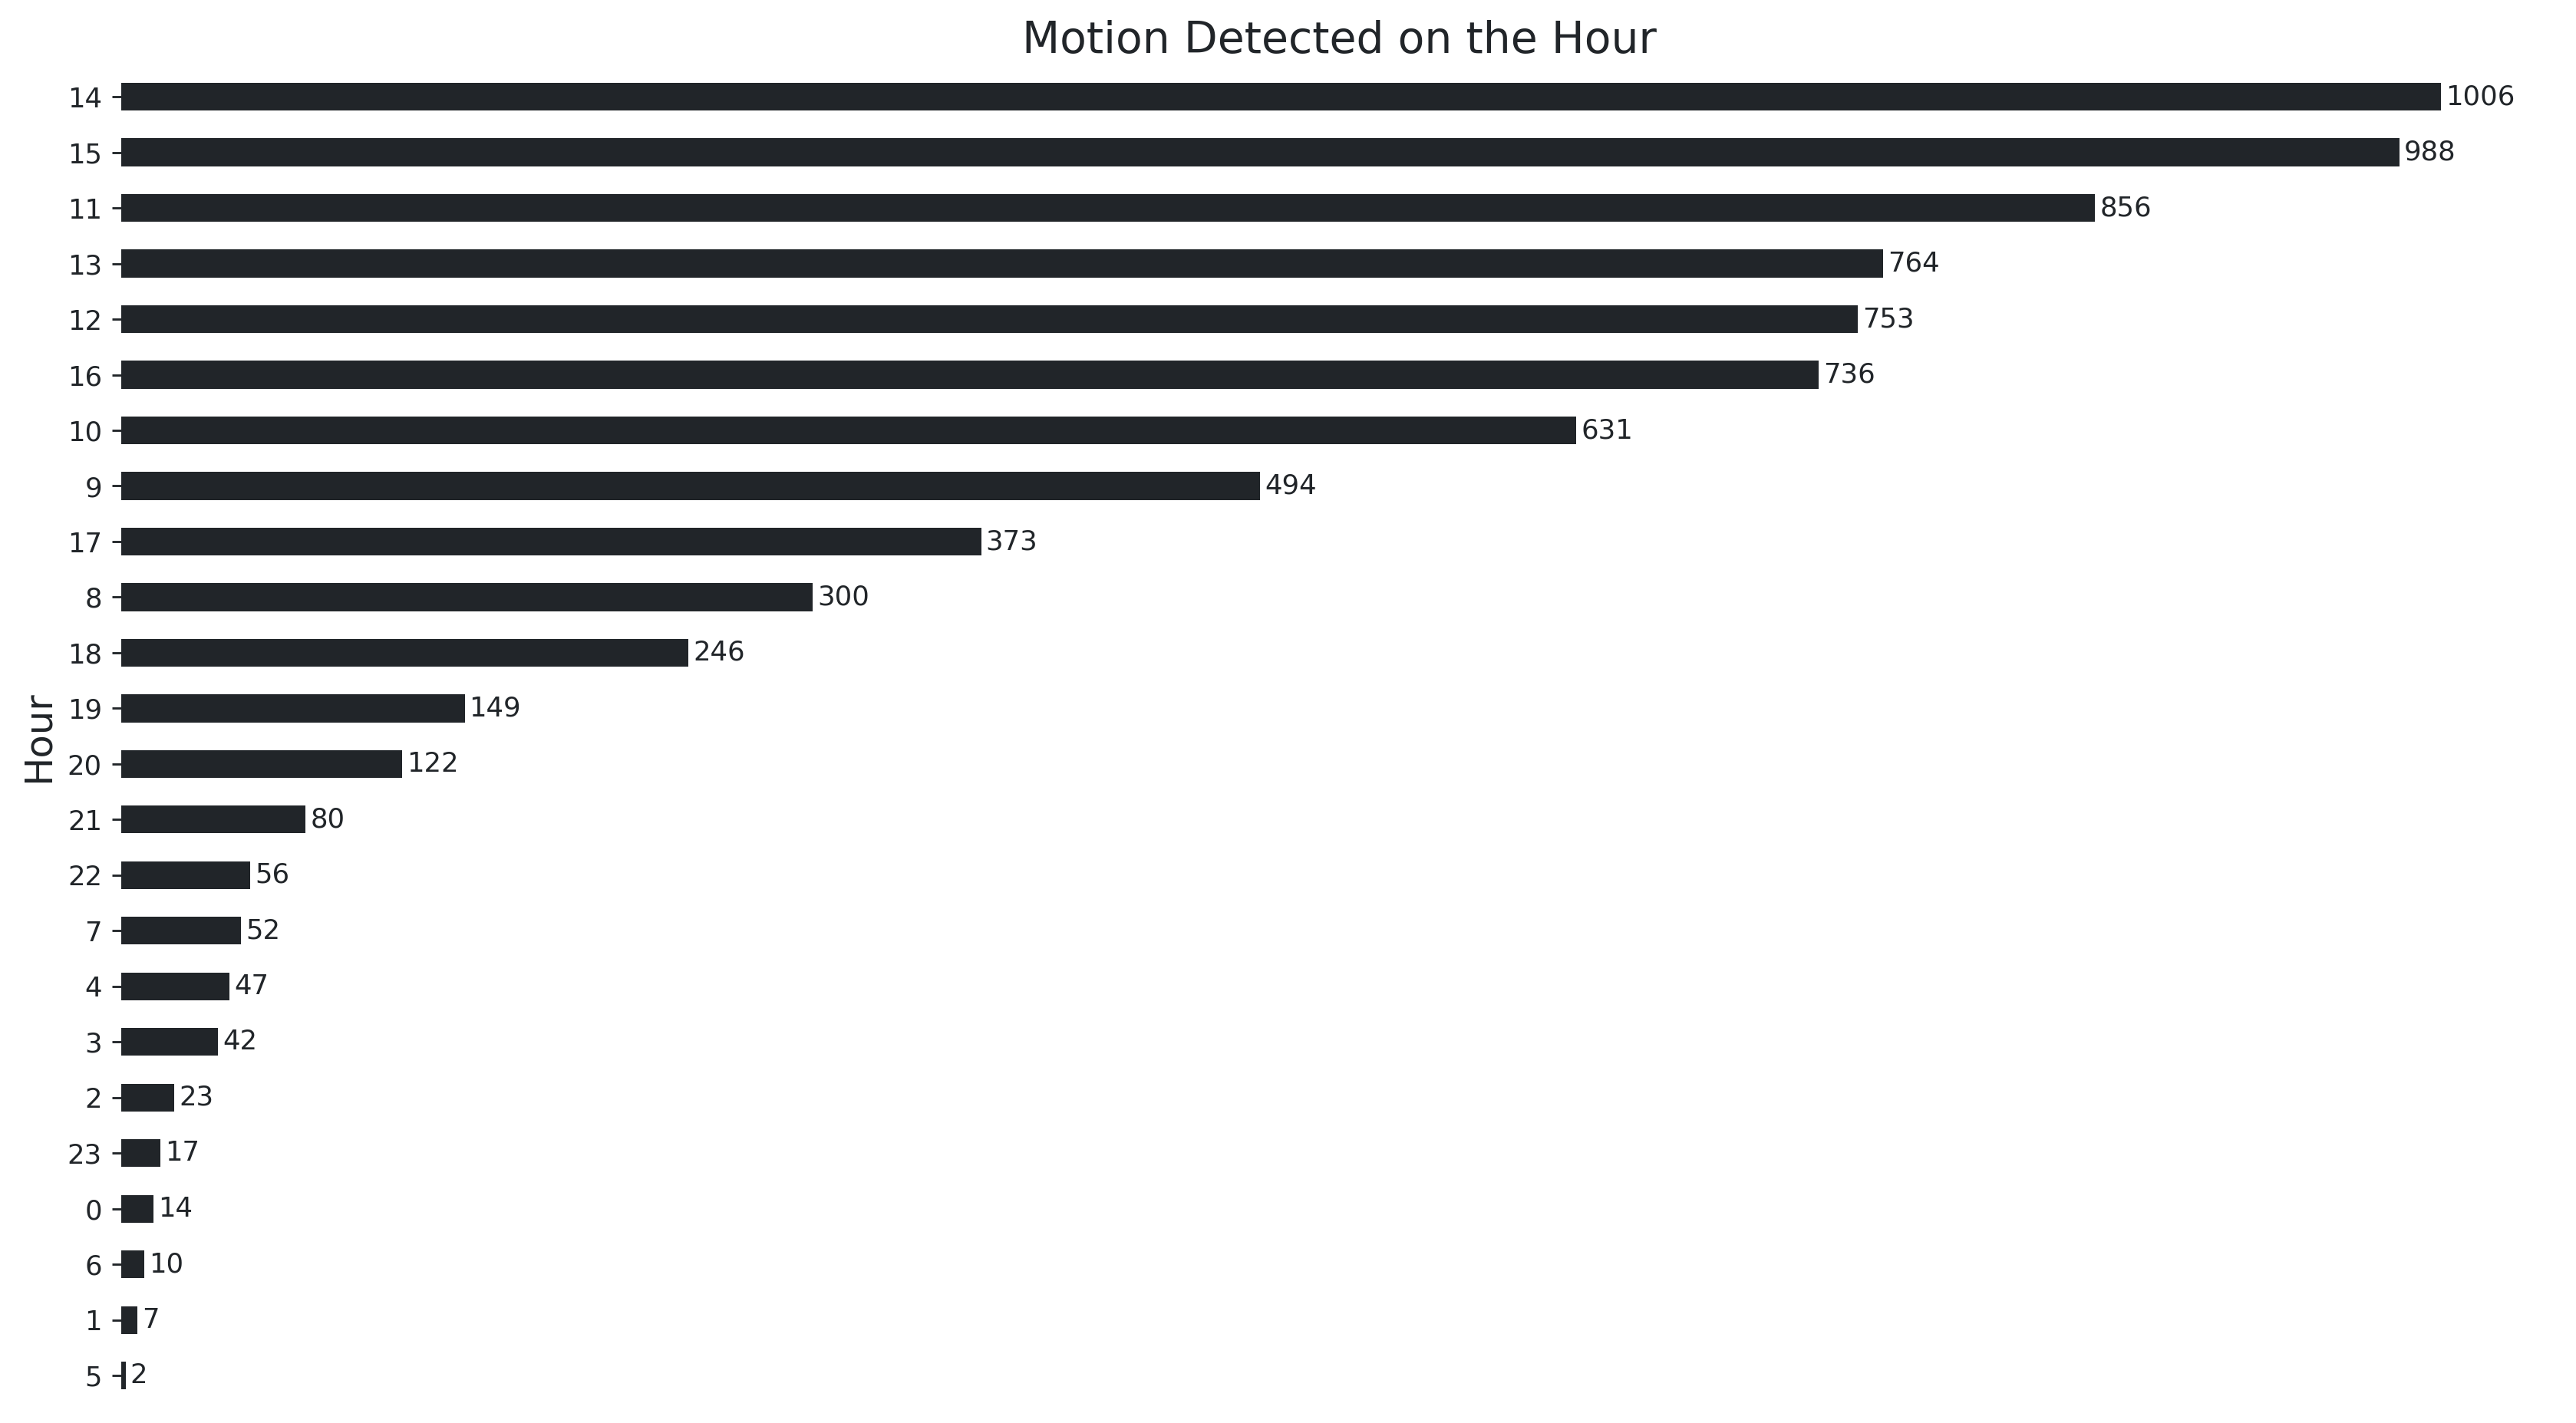

In [587]:
plt.figure(figsize=(16,9))
ir_temp = ir.groupby('hour')['Payload'].count().sort_values()
ir_temp.plot(kind='barh', color='#212529')
plt.title('Motion Detected on the Hour')
plt.ylabel('Hour')
for i, v in enumerate(ir_temp):
    plt.text(v+2, i, str(round(v, 2)), color='#212529', va="center")
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.gca().axes.xaxis.set_visible(False)
plt.xlabel('Motion Counted');

In [421]:
ir['day'] = ir['createdAt'].dt.day_name()

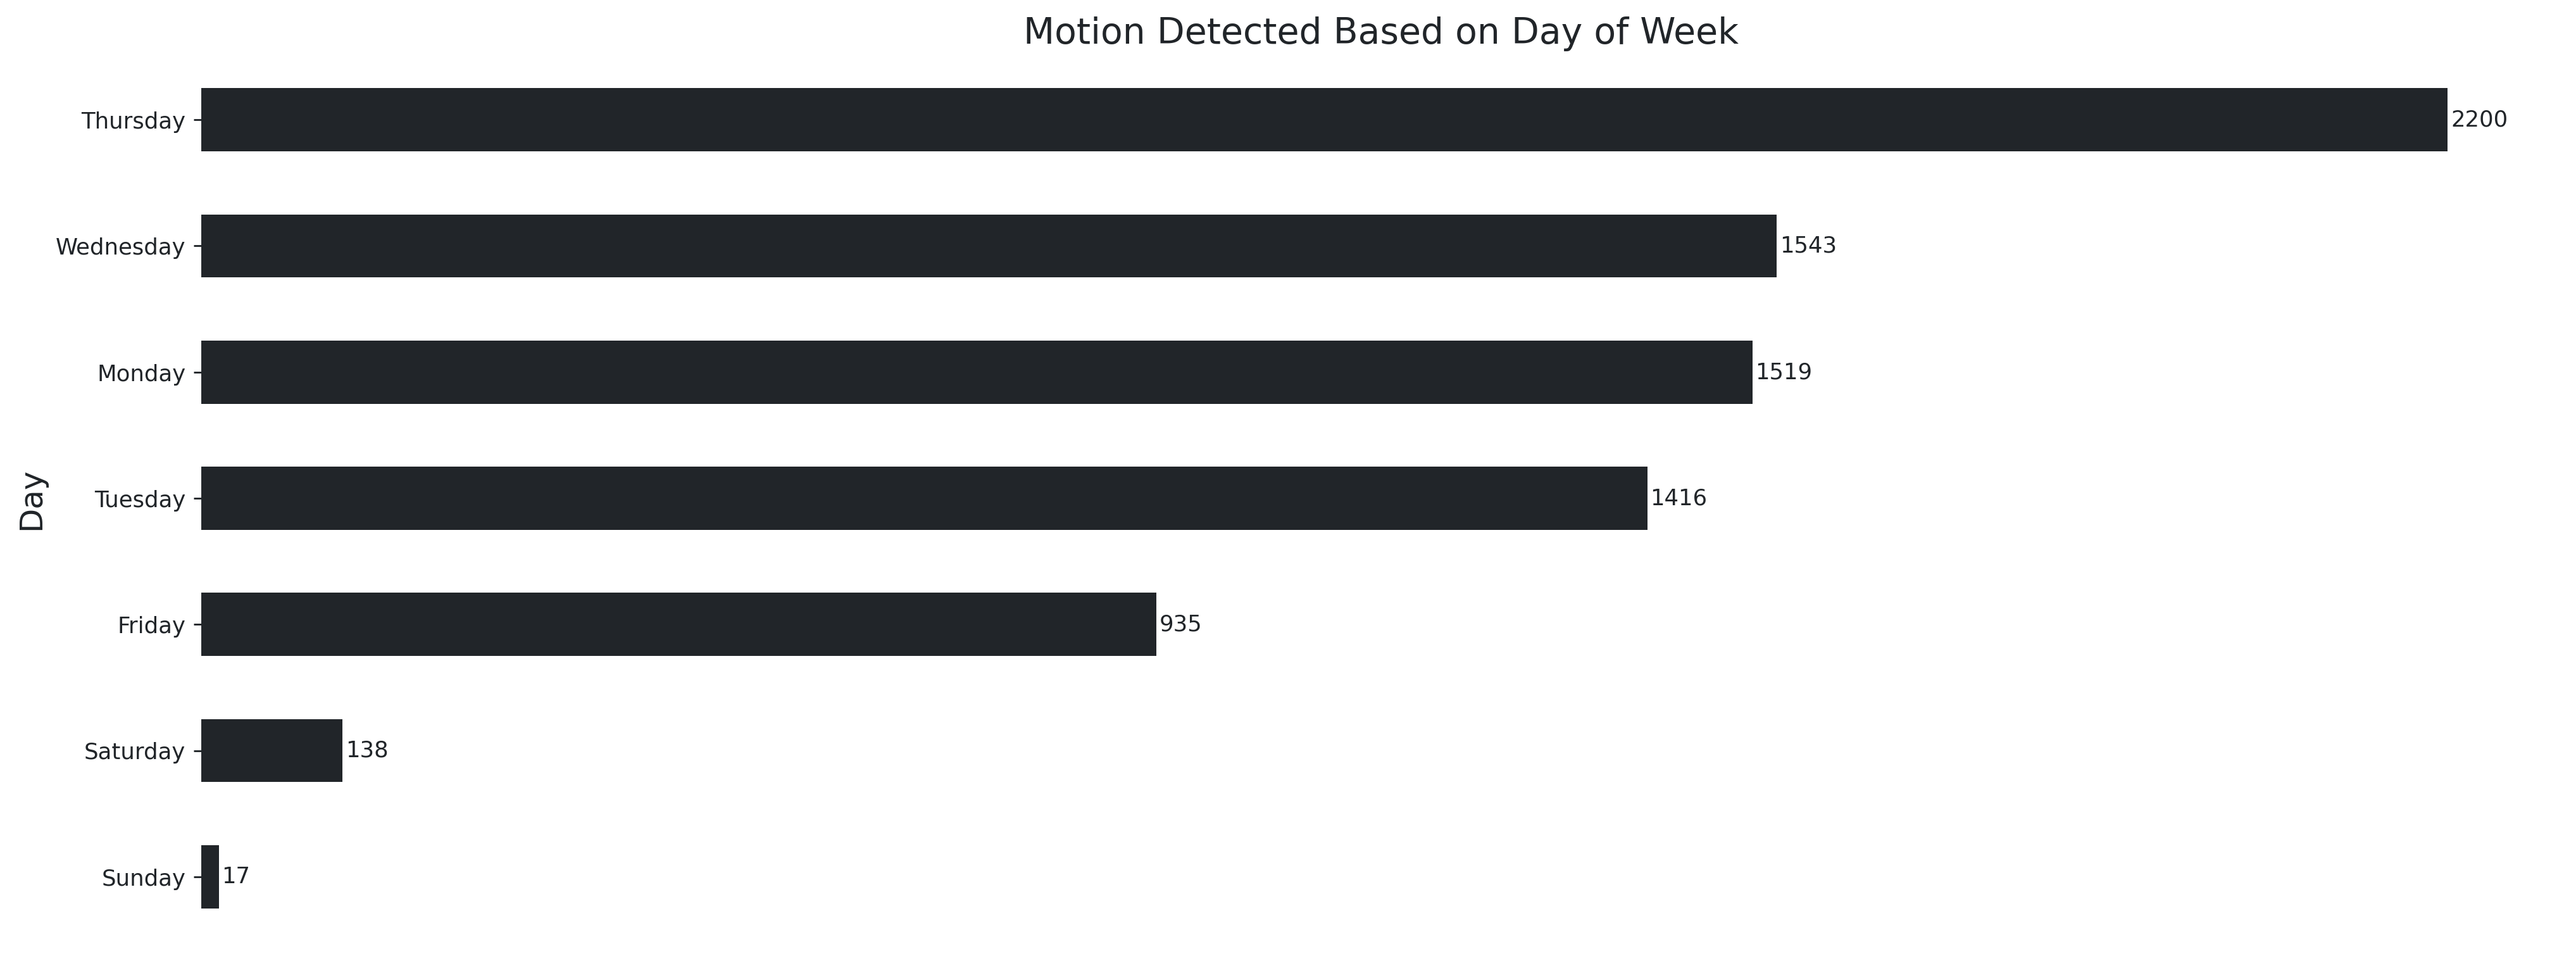

In [591]:
plt.figure(figsize=(16,6))
ir_day = ir.groupby('day')['Payload'].count().sort_values()
ir_day.plot(kind='barh', color='#212529')
plt.title('Motion Detected Based on Day of Week')
plt.xlabel('Motion Counted')
plt.ylabel('Day')
for i, v in enumerate(ir_day):
    plt.text(v+3, i, str(round(v, 2)), color='#212529', va="center")
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.gca().axes.xaxis.set_visible(False)
plt.xlabel('Motion Counted')
plt.tight_layout();

### Health

In [543]:
health = df.loc[df['eventType']=='health',]
health.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device
7309,OWL_HQ,2022-03-03T21:42:11.48,health,PAPADUCK,bsto,Time Disconnected: 6,PAPADUCK,0,1,0
7314,OWL_HQ,2022-03-03T21:44:06.166,health,PAPADUCK,7iqr,Time Disconnected: 2,PAPADUCK,0,1,0
7319,OWL_HQ,2022-03-03T21:44:42.538,health,PAPADUCK,9dco,Time Disconnected: 2,PAPADUCK,0,1,0
7320,OWL_HQ,2022-03-03T21:44:46.197,health,PAPADUCK,30v0,Time Disconnected: 2,PAPADUCK,0,1,0
7323,OWL_HQ,2022-03-03T21:45:27.27,health,PAPADUCK,83f5,Time Disconnected: 2,PAPADUCK,0,1,0


In [544]:
mamahealth = health.loc[health['DeviceID']!='PAPADUCK',].copy()
mamahealth.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device
31926,OWL_HQ,2022-03-10T17:17:57.399,health,HEALTHDK,RXNR,Counter:24Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0
31927,OWL_HQ,2022-03-10T17:18:06.435,health,HEALTHDK,C41C,Counter:34Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0
31929,OWL_HQ,2022-03-10T17:20:47.358,health,HEALTHDK,SA43,Counter:10Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0
31946,OWL_HQ,2022-03-10T17:30:07.623,health,HEALTHDK,L24N,Counter:94Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0
31958,OWL_HQ,2022-03-10T17:36:11.234,health,HEALTHDK,0KKM,Counter:13Charging:1 Full:0 Volts:-3.00 Temp:-...,,2,2,0


In [545]:
mamahealth.sort_values('createdAt', inplace=True)

In [546]:
t = mamahealth['Payload'].str.split().apply(pd.Series)

In [547]:
t[4] = t[4].fillna(t[3])

In [548]:
t.loc[t[3].str.contains('Temp'),3] = np.nan

In [549]:
t[3] = t[3].fillna(t[2])

In [550]:
t.loc[t[2].str.contains('Volts'),2] = np.nan

In [551]:
t[2] = t[2].fillna(t[1])

In [552]:
t.loc[t[1].str.contains('Full'),1] = np.nan

In [553]:
t[1] = t[1].fillna(t[0].str.split("Charging").apply(pd.Series)[1])

In [554]:
t

,0,1,2,3,4
31926,Counter:24Charging:1,:1,Full:0,Volts:-3.00,Temp:-3.00
31927,Counter:34Charging:1,:1,Full:0,Volts:-3.00,Temp:-3.00
31929,Counter:10Charging:1,:1,Full:0,Volts:-3.00,Temp:-3.00
31946,Counter:94Charging:1,:1,Full:0,Volts:-3.00,Temp:-3.00
31958,Counter:13Charging:1,:1,Full:0,Volts:-3.00,Temp:-3.00
...,...,...,...,...,...
164305,Counter:56243,Charging:0,Full:0,Volts:4133.80,Temp:55.60
164306,Counter:56246,Charging:0,Full:0,Volts:4106.30,Temp:48.30
164307,Counter:56244,Charging:0,Full:0,Volts:4133.80,Temp:55.60
164308,Counter:56247,Charging:0,Full:0,Volts:4106.30,Temp:48.20


In [555]:
t.columns = ['counter', 'charging', 'full', 'volts', 'temp']

In [556]:
mamahealth['charging'] = t['charging'].str.split(":").apply(pd.Series)[1].astype(int)

In [559]:
mamahealth['counter'] = t['counter'].str.split("Charging:").apply(pd.Series)[0].str.split(":").apply(pd.Series)[1].astype(int)

In [564]:

mamahealth['full'] = t['full'].str.split(":").apply(pd.Series)[1].astype(int)

In [565]:
mamahealth['volts'] = t['volts'].str.split(":").apply(pd.Series)[1].astype(float)
mamahealth['board_temp'] = t['temp'].str.split(":").apply(pd.Series)[1].astype(float)

In [566]:
mamahealth.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp
31926,OWL_HQ,2022-03-10T17:17:57.399,health,HEALTHDK,RXNR,Counter:24Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,24,0,-3.0,-3.0
31927,OWL_HQ,2022-03-10T17:18:06.435,health,HEALTHDK,C41C,Counter:34Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,34,0,-3.0,-3.0
31929,OWL_HQ,2022-03-10T17:20:47.358,health,HEALTHDK,SA43,Counter:10Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,10,0,-3.0,-3.0
31946,OWL_HQ,2022-03-10T17:30:07.623,health,HEALTHDK,L24N,Counter:94Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,94,0,-3.0,-3.0
31958,OWL_HQ,2022-03-10T17:36:11.234,health,HEALTHDK,0KKM,Counter:13Charging:1 Full:0 Volts:-3.00 Temp:-...,,2,2,0,1,13,0,-3.0,-3.0


In [609]:
mama_clean = get_time(mamahealth.loc[mamahealth['volts']>0,])

<AxesSubplot:xlabel='date'>

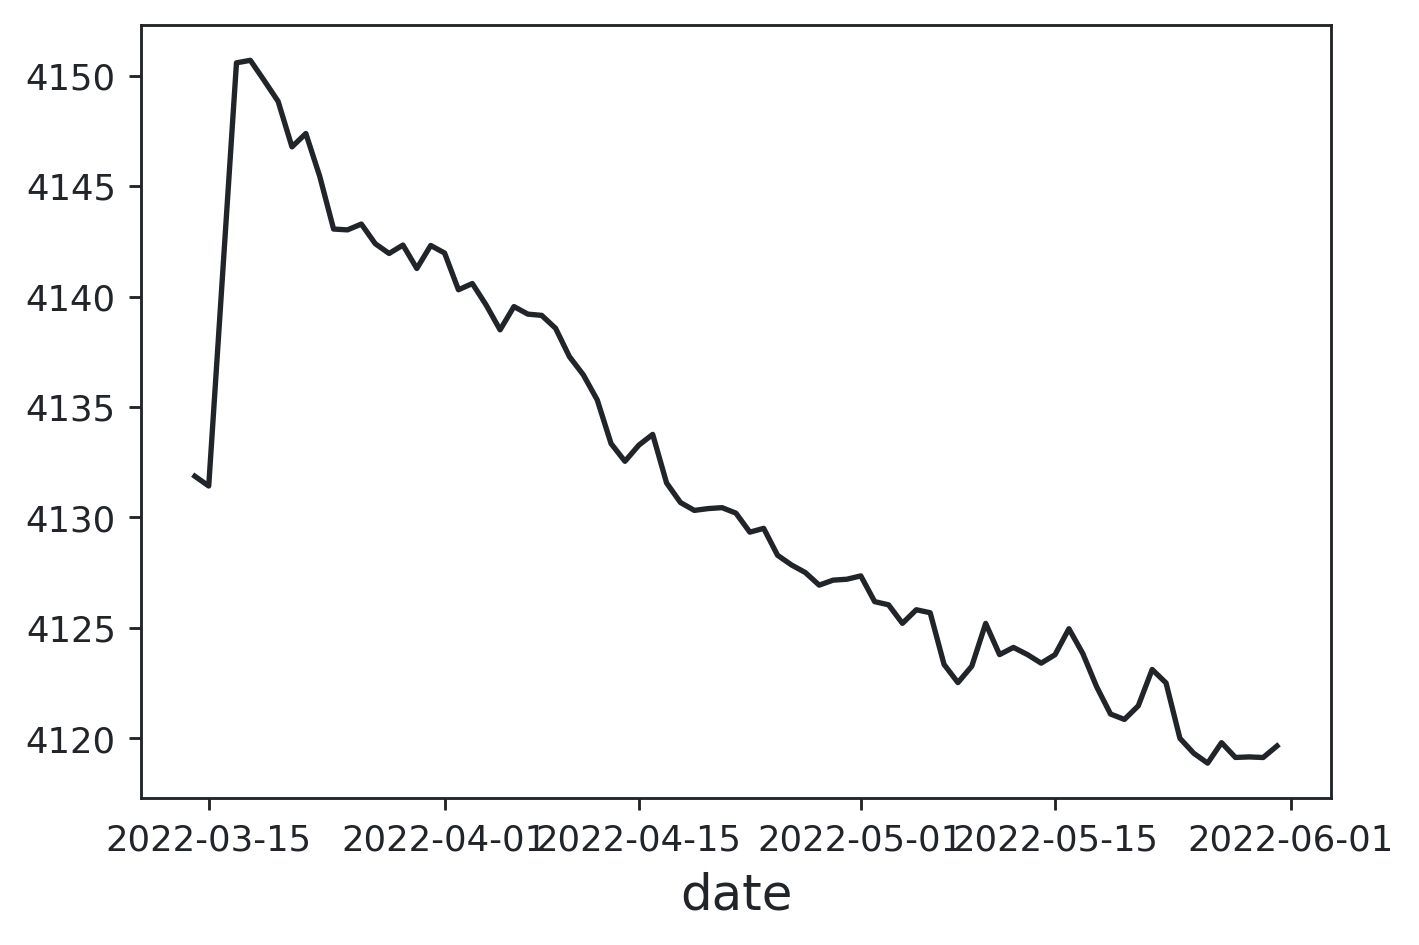

In [706]:
fig, ax = plt.subplots()
mama_clean.groupby('date')['volts'].mean().plot(label='Daily Volts', ax=ax, color='#212529')
# plt.grid()
# plt.title("Average Daily Volts")
# # plt.axhline(mama_clean['pressure'].mean(), color='r', linestyle='--', label=f"Avg Temp: {bmp180['pressure'].mean():1f} Pa")
# plt.xticks(rotation=30)
# plt.xlabel('Date')
# # ax.annotate(
# #     f"Avg Pressure: {np.round(bmp180['pressure'].mean())} Pa", 
# #     xy=('2022-04-08', bmp180['pressure'].mean()), xytext=('2022-03-22', 103000),
# #     color='red',
# #     arrowprops=dict(arrowstyle="->", color='red'),
# # )
# plt.ylabel("Volts (V)");

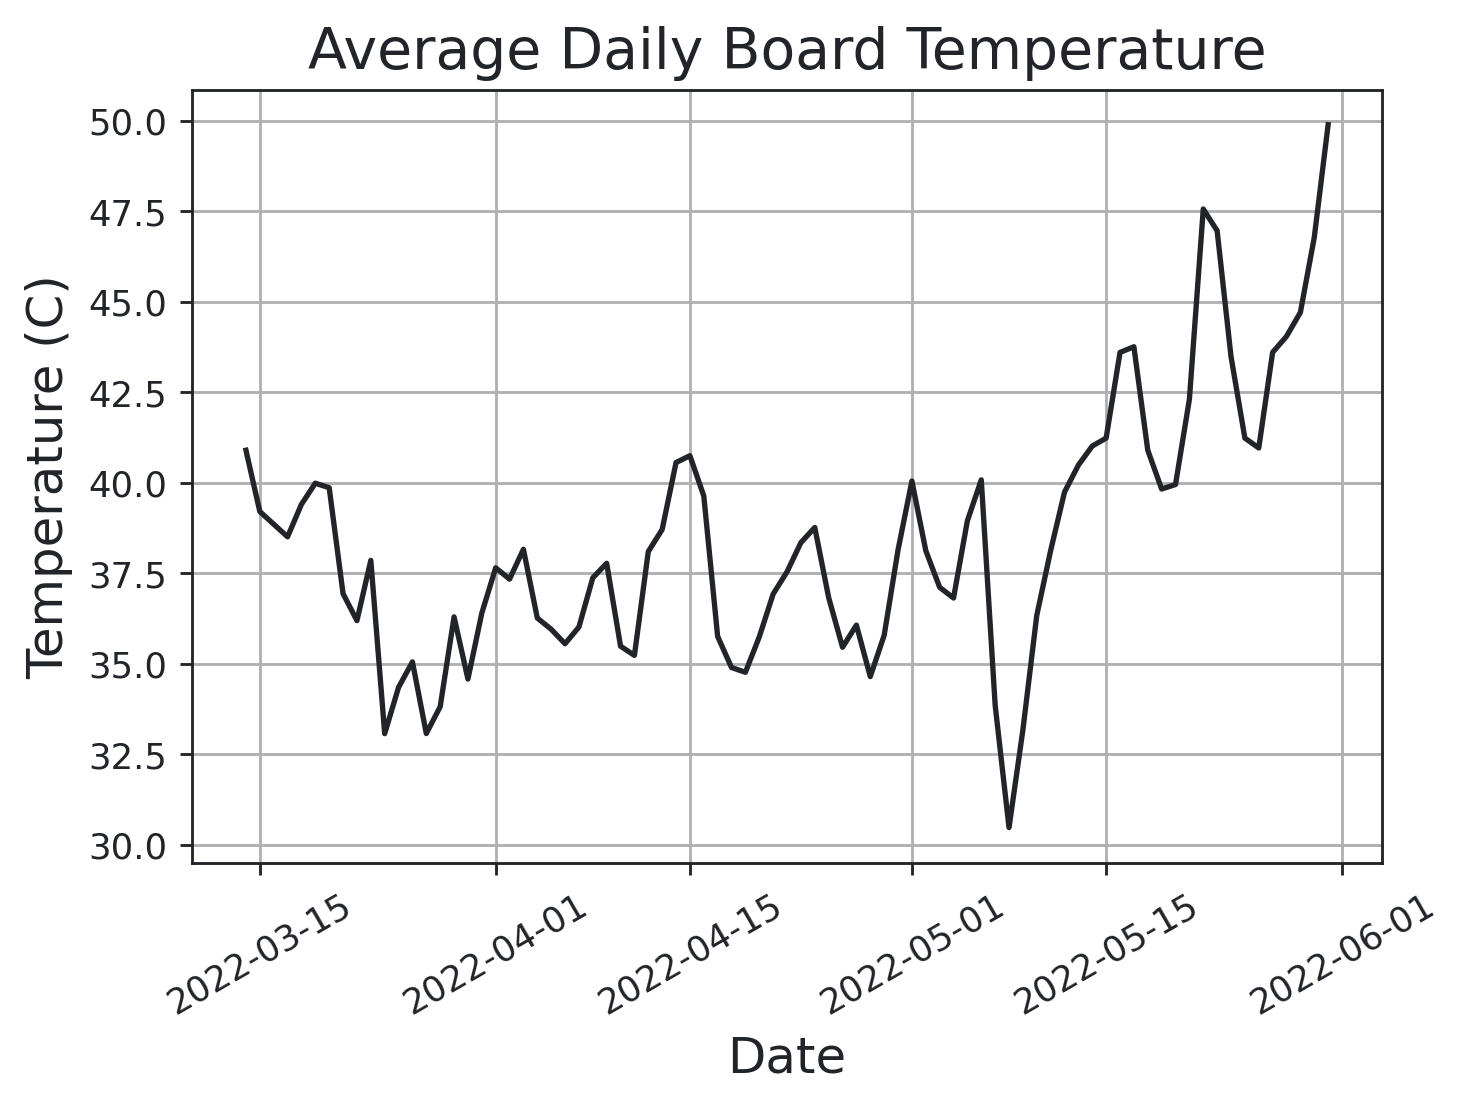

In [613]:
fig, ax = plt.subplots()
mama_clean.groupby('date')['board_temp'].mean().plot(ax=ax, color='#212529')
plt.grid()
plt.title("Average Daily Board Temperature")
# plt.axhline(mama_clean['pressure'].mean(), color='r', linestyle='--', label=f"Avg Temp: {bmp180['pressure'].mean():1f} Pa")
plt.xticks(rotation=30)
plt.xlabel('Date')
# ax.annotate(
#     f"Avg Pressure: {np.round(bmp180['pressure'].mean())} Pa", 
#     xy=('2022-04-08', bmp180['pressure'].mean()), xytext=('2022-03-22', 103000),
#     color='red',
#     arrowprops=dict(arrowstyle="->", color='red'),
# )
plt.ylabel("Temperature (C)");

In [722]:
device_mean = mama_clean.groupby(['DeviceID', 'date'])['board_temp'].mean()
device_mean

DeviceID  date      
HEALTHDK  2022-03-14    43.392424
          2022-03-15    43.141463
          2022-03-17    41.525410
          2022-03-18    43.409456
          2022-03-19    43.687759
                          ...    
IRDUCK01  2022-05-27    39.659727
          2022-05-28    39.677491
          2022-05-29    40.253959
          2022-05-30    42.697715
          2022-05-31    45.820746
Name: board_temp, Length: 156, dtype: float64

In [729]:
mama_clean['DeviceID'].unique()

array(['HEALTHDK', 'IRDUCK01'], dtype=object)

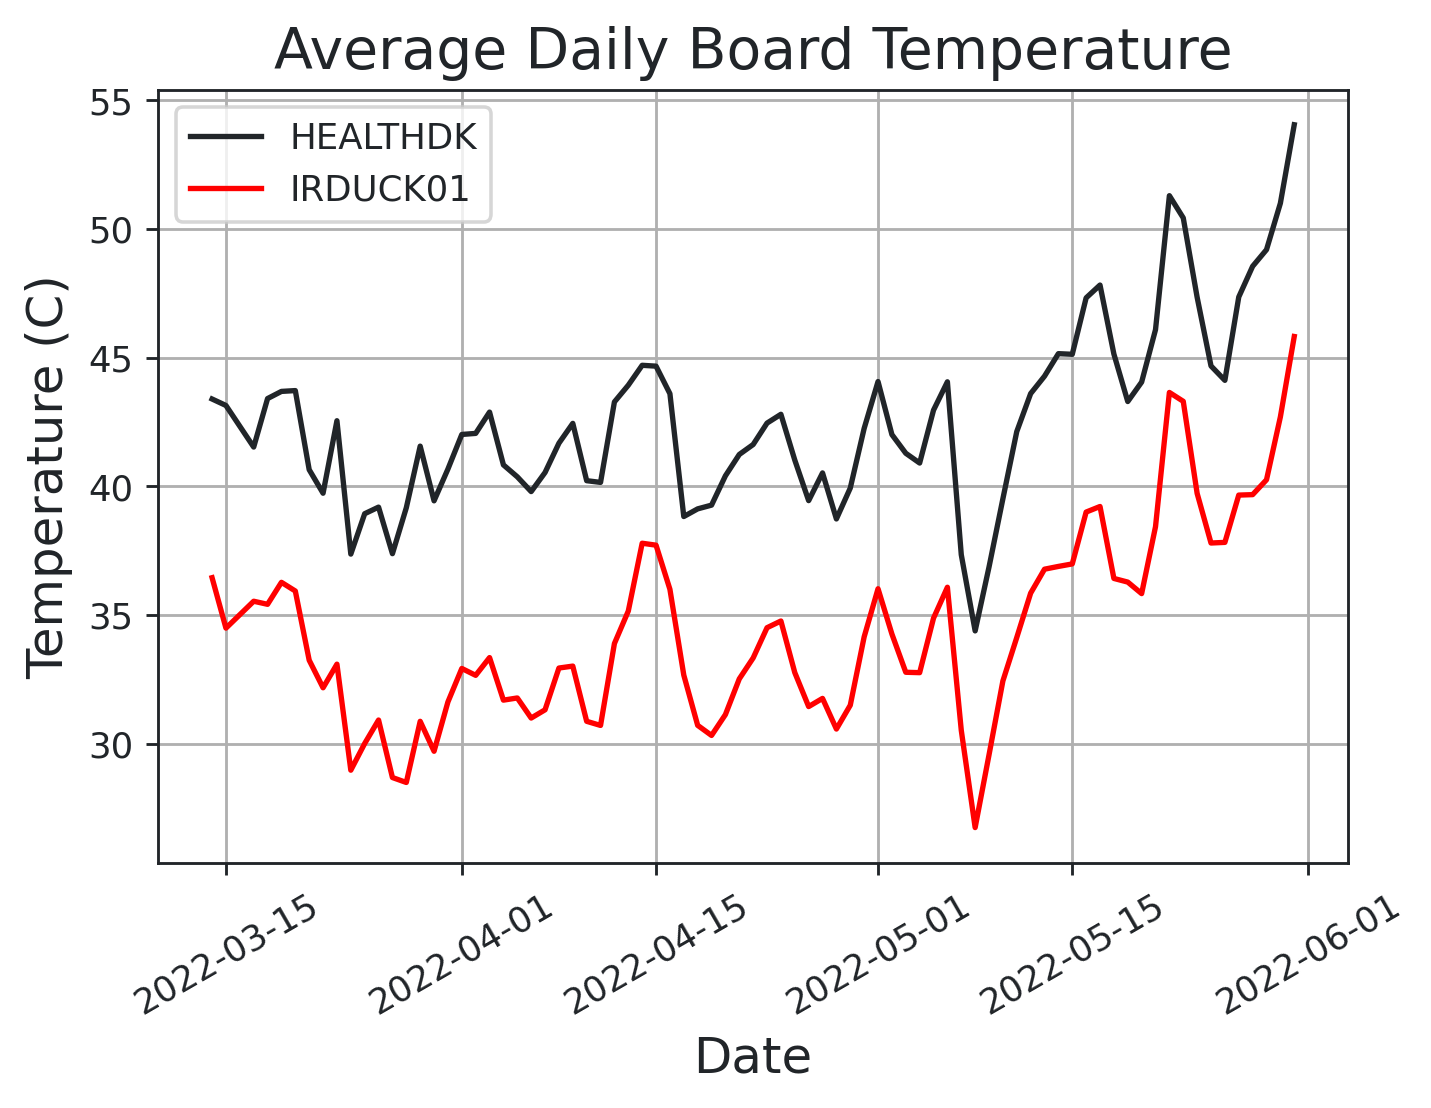

In [733]:
fig, ax = plt.subplots()
ducks = ['HEALTHDK', 'IRDUCK01']
for duck, color in zip(ducks, ['#212529', 'red']):
    temp = mama_clean.loc[mama_clean['DeviceID']==duck,].groupby('date')['board_temp'].mean().plot(ax=ax, color=color, label=duck)
plt.legend()
plt.grid()
plt.title("Average Daily Board Temperature")
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel("Temperature (C)");

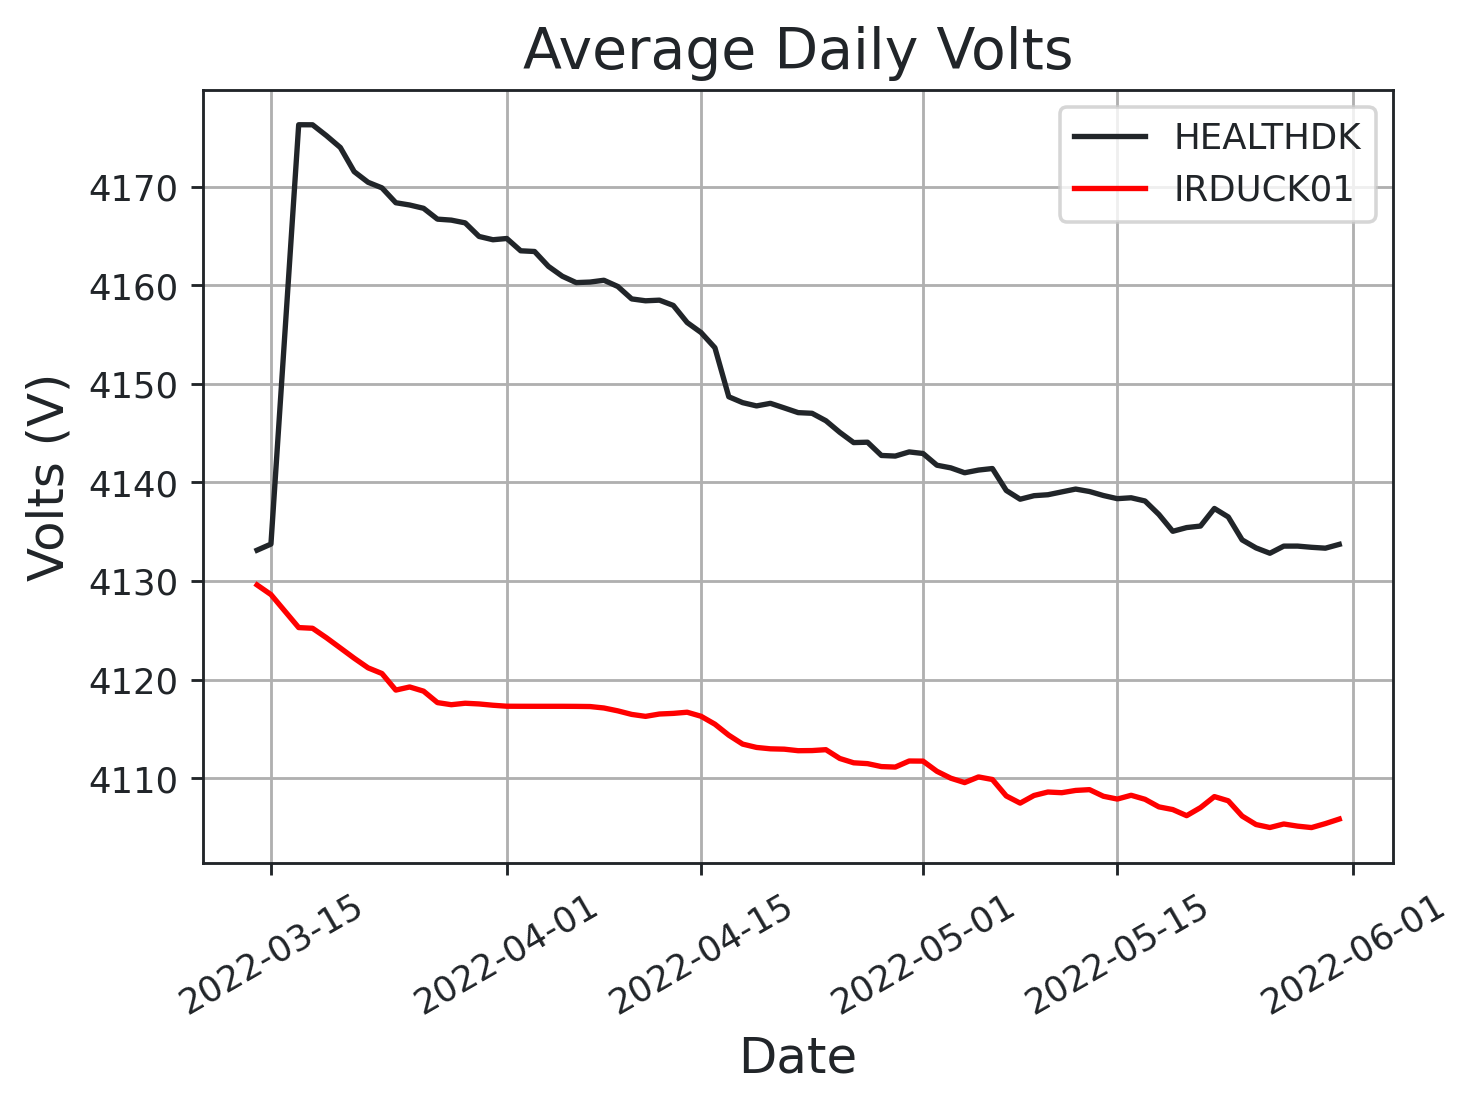

In [735]:
fig, ax = plt.subplots()
ducks = ['HEALTHDK', 'IRDUCK01']
for duck, color in zip(ducks, ['#212529', 'red']):
    temp = mama_clean.loc[mama_clean['DeviceID']==duck,].groupby('date')['volts'].mean().plot(ax=ax, color=color, label=duck)
plt.legend()
plt.grid()
plt.title("Average Daily Volts")
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel("Volts (V)");

## MAMAHEALTH

In [740]:
mamahealth

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp
31926,OWL_HQ,2022-03-10T17:17:57.399,health,HEALTHDK,RXNR,Counter:24Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,24,0,-3.0,-3.0
31927,OWL_HQ,2022-03-10T17:18:06.435,health,HEALTHDK,C41C,Counter:34Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,34,0,-3.0,-3.0
31929,OWL_HQ,2022-03-10T17:20:47.358,health,HEALTHDK,SA43,Counter:10Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,10,0,-3.0,-3.0
31946,OWL_HQ,2022-03-10T17:30:07.623,health,HEALTHDK,L24N,Counter:94Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,94,0,-3.0,-3.0
31958,OWL_HQ,2022-03-10T17:36:11.234,health,HEALTHDK,0KKM,Counter:13Charging:1 Full:0 Volts:-3.00 Temp:-...,,2,2,0,1,13,0,-3.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164305,OWL_HQ,2022-05-31T23:55:12.466,health,HEALTHDK,RZA7,Counter:56243 Charging:0 Full:0 Volts:4133.80 ...,,1,2,0,0,56243,0,4133.8,55.6
164306,OWL_HQ,2022-05-31T23:56:56.542,health,IRDUCK01,CXH0,Counter:56246 Charging:0 Full:0 Volts:4106.30 ...,,1,2,0,0,56246,0,4106.3,48.3
164307,OWL_HQ,2022-05-31T23:57:12.083,health,HEALTHDK,PQEL,Counter:56244 Charging:0 Full:0 Volts:4133.80 ...,,1,2,0,0,56244,0,4133.8,55.6
164308,OWL_HQ,2022-05-31T23:58:56.558,health,IRDUCK01,YMLH,Counter:56247 Charging:0 Full:0 Volts:4106.30 ...,,1,2,0,0,56247,0,4106.3,48.2


In [741]:
health_mamahealth = mamahealth.loc[mamahealth['DeviceID']=='HEALTHDK',]
health_mamahealth

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp
31926,OWL_HQ,2022-03-10T17:17:57.399,health,HEALTHDK,RXNR,Counter:24Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,24,0,-3.0,-3.0
31927,OWL_HQ,2022-03-10T17:18:06.435,health,HEALTHDK,C41C,Counter:34Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,34,0,-3.0,-3.0
31929,OWL_HQ,2022-03-10T17:20:47.358,health,HEALTHDK,SA43,Counter:10Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,10,0,-3.0,-3.0
31946,OWL_HQ,2022-03-10T17:30:07.623,health,HEALTHDK,L24N,Counter:94Charging:1 Full:0 Volts:-3.00 Temp:-...,,1,2,0,1,94,0,-3.0,-3.0
31958,OWL_HQ,2022-03-10T17:36:11.234,health,HEALTHDK,0KKM,Counter:13Charging:1 Full:0 Volts:-3.00 Temp:-...,,2,2,0,1,13,0,-3.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164301,OWL_HQ,2022-05-31T23:51:12.258,health,HEALTHDK,T29B,Counter:56241 Charging:0 Full:0 Volts:4133.80 ...,,1,2,0,0,56241,0,4133.8,56.0
164303,OWL_HQ,2022-05-31T23:53:12.147,health,HEALTHDK,EOET,Counter:56242 Charging:0 Full:0 Volts:4132.70 ...,,1,2,0,0,56242,0,4132.7,56.0
164305,OWL_HQ,2022-05-31T23:55:12.466,health,HEALTHDK,RZA7,Counter:56243 Charging:0 Full:0 Volts:4133.80 ...,,1,2,0,0,56243,0,4133.8,55.6
164307,OWL_HQ,2022-05-31T23:57:12.083,health,HEALTHDK,PQEL,Counter:56244 Charging:0 Full:0 Volts:4133.80 ...,,1,2,0,0,56244,0,4133.8,55.6


In [745]:
health_mamahealth = health_mamahealth.loc[health_mamahealth['volts']>0,].sort_values('createdAt')

<AxesSubplot:>

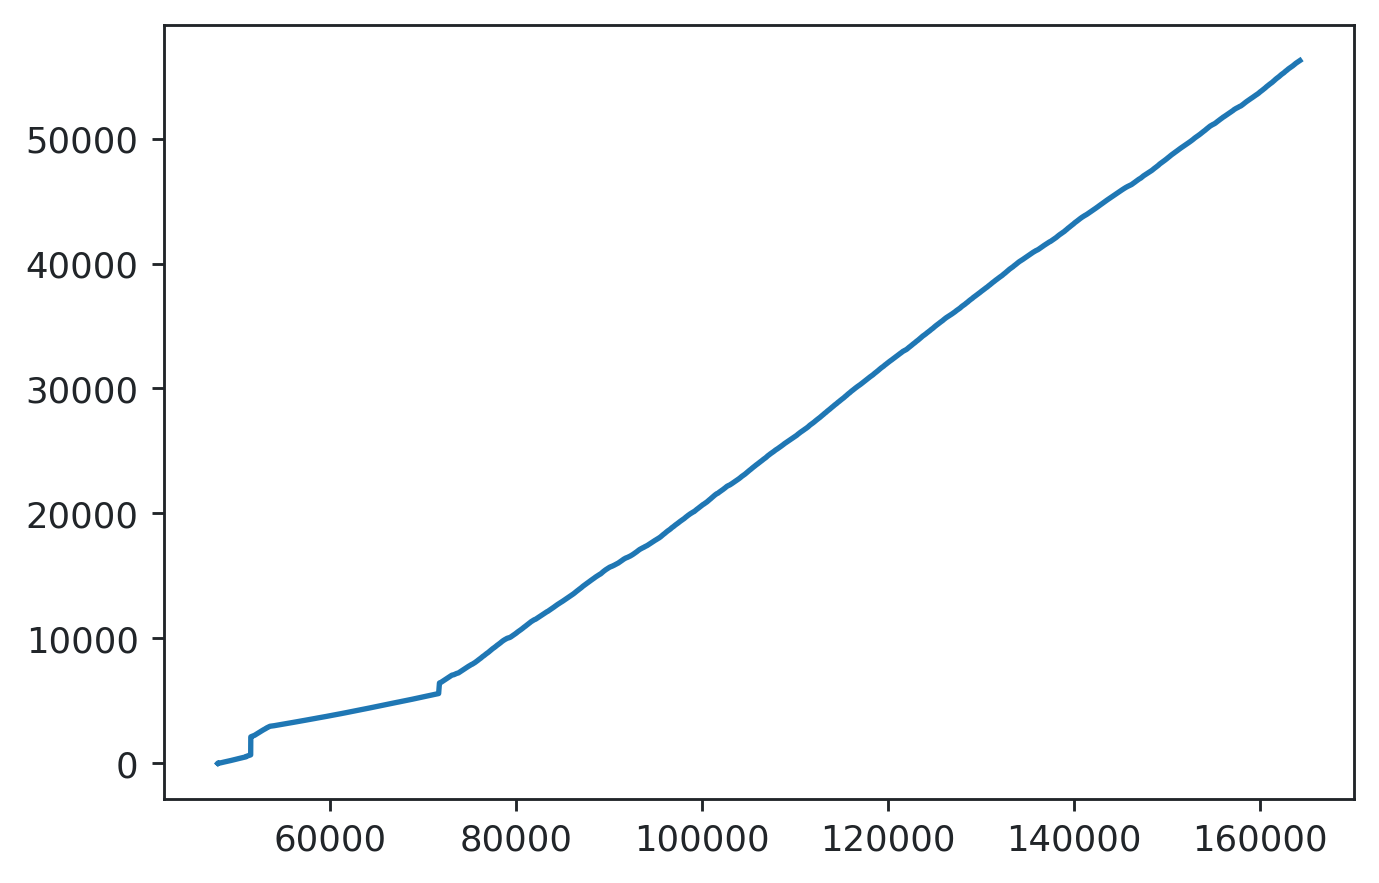

In [747]:
health_mamahealth['counter'].plot()

In [749]:
health_mamahealth['packet_loss'] = health_mamahealth['counter'].diff()

In [763]:
health_mamahealth['packet_loss'].value_counts()

 1.0       36935
 2.0        4491
 3.0        1378
 0.0         561
 4.0         498
 5.0         201
 6.0          71
 7.0          28
 8.0          22
 9.0           7
 10.0          3
-31.0          1
 30.0          1
 1438.0        1
 15.0          1
 840.0         1
 11.0          1
Name: packet_loss, dtype: int64

In [754]:
health_mamahealth.loc[health_mamahealth['packet_loss']>100,'packet_loss'].value_counts()

1438.0    1
840.0     1
Name: packet_loss, dtype: int64

In [756]:
health_mamahealth.loc[health_mamahealth['packet_loss']==-31,]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp,packet_loss
48010,OWL_HQ,2022-03-14T21:08:16.941,health,HEALTHDK,O0K3,Counter:1 Charging:0 Full:0 Volts:4136.00 Temp...,,1,2,0,0,1,0,4136.0,45.5,-31.0


In [757]:
health_mamahealth.loc[health_mamahealth['packet_loss']==0,]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp,packet_loss
48019,OWL_HQ,2022-03-14T21:10:51.054,health,HEALTHDK,O823,Counter:1 Charging:0 Full:0 Volts:4132.70 Temp...,,1,2,0,0,1,0,4132.7,44.5,0.0
48408,OWL_HQ,2022-03-14T23:21:05.712,health,HEALTHDK,7IMR,Counter:66 Charging:0 Full:0 Volts:4133.80 Tem...,,1,2,0,0,66,0,4133.8,43.4,0.0
49113,OWL_HQ,2022-03-15T03:19:05.47,health,HEALTHDK,BBKJ,Counter:185 Charging:0 Full:0 Volts:4131.60 Te...,,1,2,0,0,185,0,4131.6,38.3,0.0
50149,OWL_HQ,2022-03-15T09:33:00.998,health,HEALTHDK,F5MM,Counter:372 Charging:0 Full:0 Volts:4133.80 Te...,,1,2,0,0,372,0,4133.8,40.2,0.0
50234,OWL_HQ,2022-03-15T10:02:57.025,health,HEALTHDK,Y42R,Counter:387 Charging:0 Full:0 Volts:4132.70 Te...,,1,2,0,0,387,0,4132.7,39.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68628,OWL_HQ,2022-03-21T22:55:07.497,health,HEALTHDK,VI5F,Counter:5093 Charging:0 Full:0 Volts:4172.30 T...,,1,2,0,0,5093,0,4172.3,41.9,0.0
68730,OWL_HQ,2022-03-21T23:27:14.492,health,HEALTHDK,ILQJ,Counter:5109 Charging:0 Full:0 Volts:4171.20 T...,,1,2,0,0,5109,0,4171.2,42.4,0.0
68988,OWL_HQ,2022-03-22T00:53:08.608,health,HEALTHDK,L2SO,Counter:5152 Charging:0 Full:0 Volts:4171.20 T...,,1,2,0,0,5152,0,4171.2,41.7,0.0
69933,OWL_HQ,2022-03-22T05:56:57.908,health,HEALTHDK,1CTJ,Counter:5304 Charging:0 Full:0 Volts:4171.20 T...,,1,2,0,0,5304,0,4171.2,40.1,0.0


In [758]:
health_mamahealth.loc[health_mamahealth['counter']==1,] #2022-03-14T21:08:16.941

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp,packet_loss
48010,OWL_HQ,2022-03-14T21:08:16.941,health,HEALTHDK,O0K3,Counter:1 Charging:0 Full:0 Volts:4136.00 Temp...,,1,2,0,0,1,0,4136.0,45.5,-31.0
48019,OWL_HQ,2022-03-14T21:10:51.054,health,HEALTHDK,O823,Counter:1 Charging:0 Full:0 Volts:4132.70 Temp...,,1,2,0,0,1,0,4132.7,44.5,0.0


In [762]:
health_mamahealth.loc[health_mamahealth['createdAt']<='22-03-14T21:08:17.000',]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp,packet_loss
47967,OWL_HQ,2022-03-14T21:00:04.087,health,HEALTHDK,I9EG,Counter:3 Charging:0 Full:0 Volts:4098.60 Temp...,,1,2,0,0,3,0,4098.6,44.0,NaN
47971,OWL_HQ,2022-03-14T21:00:40.494,health,HEALTHDK,O008,Counter:6 Charging:0 Full:0 Volts:4136.00 Temp...,,1,2,0,0,6,0,4136.0,44.8,3.0
47973,OWL_HQ,2022-03-14T21:00:56.419,health,HEALTHDK,TVIM,Counter:7 Charging:0 Full:0 Volts:4136.00 Temp...,,1,2,0,0,7,0,4136.0,44.8,1.0
47978,OWL_HQ,2022-03-14T21:01:52.097,health,HEALTHDK,YXEC,Counter:12 Charging:0 Full:0 Volts:4137.10 Tem...,,1,2,0,0,12,0,4137.1,45.0,5.0
47984,OWL_HQ,2022-03-14T21:02:29.193,health,HEALTHDK,329F,Counter:15 Charging:0 Full:0 Volts:4137.10 Tem...,,1,2,0,0,15,0,4137.1,44.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164301,OWL_HQ,2022-05-31T23:51:12.258,health,HEALTHDK,T29B,Counter:56241 Charging:0 Full:0 Volts:4133.80 ...,,1,2,0,0,56241,0,4133.8,56.0,1.0
164303,OWL_HQ,2022-05-31T23:53:12.147,health,HEALTHDK,EOET,Counter:56242 Charging:0 Full:0 Volts:4132.70 ...,,1,2,0,0,56242,0,4132.7,56.0,1.0
164305,OWL_HQ,2022-05-31T23:55:12.466,health,HEALTHDK,RZA7,Counter:56243 Charging:0 Full:0 Volts:4133.80 ...,,1,2,0,0,56243,0,4133.8,55.6,1.0
164307,OWL_HQ,2022-05-31T23:57:12.083,health,HEALTHDK,PQEL,Counter:56244 Charging:0 Full:0 Volts:4133.80 ...,,1,2,0,0,56244,0,4133.8,55.6,1.0


In [765]:
health_mamahealth['createdAt'] = pd.to_datetime(health_mamahealth['createdAt'])

In [772]:
health_mamahealth.loc[health_mamahealth['createdAt']<=pd.to_datetime('2022-03-14T21:11:51.054', yearfirst=True),]

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp,packet_loss
47967,OWL_HQ,2022-03-14 21:00:04.087,health,HEALTHDK,I9EG,Counter:3 Charging:0 Full:0 Volts:4098.60 Temp...,,1,2,0,0,3,0,4098.6,44.0,NaN
47971,OWL_HQ,2022-03-14 21:00:40.494,health,HEALTHDK,O008,Counter:6 Charging:0 Full:0 Volts:4136.00 Temp...,,1,2,0,0,6,0,4136.0,44.8,3.0
47973,OWL_HQ,2022-03-14 21:00:56.419,health,HEALTHDK,TVIM,Counter:7 Charging:0 Full:0 Volts:4136.00 Temp...,,1,2,0,0,7,0,4136.0,44.8,1.0
47978,OWL_HQ,2022-03-14 21:01:52.097,health,HEALTHDK,YXEC,Counter:12 Charging:0 Full:0 Volts:4137.10 Tem...,,1,2,0,0,12,0,4137.1,45.0,5.0
47984,OWL_HQ,2022-03-14 21:02:29.193,health,HEALTHDK,329F,Counter:15 Charging:0 Full:0 Volts:4137.10 Tem...,,1,2,0,0,15,0,4137.1,44.8,3.0
47987,OWL_HQ,2022-03-14 21:02:52.406,health,HEALTHDK,N7L1,Counter:17 Charging:0 Full:0 Volts:4137.10 Tem...,,2,2,0,0,17,0,4137.1,44.7,2.0
47988,OWL_HQ,2022-03-14 21:03:04.106,health,HEALTHDK,UZTP,Counter:18 Charging:0 Full:0 Volts:4136.00 Tem...,,1,2,0,0,18,0,4136.0,45.1,1.0
47992,OWL_HQ,2022-03-14 21:03:51.602,health,HEALTHDK,NXVY,Counter:21 Charging:0 Full:0 Volts:4137.10 Tem...,,1,2,0,0,21,0,4137.1,44.5,3.0
47993,OWL_HQ,2022-03-14 21:03:52.519,health,HEALTHDK,0THU,Counter:22 Charging:0 Full:0 Volts:4136.00 Tem...,,1,2,0,0,22,0,4136.0,44.8,1.0
47994,OWL_HQ,2022-03-14 21:04:04.103,health,HEALTHDK,GQ81,Counter:23 Charging:0 Full:0 Volts:4099.70 Tem...,,1,2,0,0,23,0,4099.7,44.0,1.0


In [770]:
pd.to_datetime('22-03-14T21:08:17.000', yearfirst=True)

Timestamp('2022-03-14 21:08:17')

In [769]:
health_mamahealth['createdAt']

47967    2022-03-14 21:00:04.087
47971    2022-03-14 21:00:40.494
47973    2022-03-14 21:00:56.419
47978    2022-03-14 21:01:52.097
47984    2022-03-14 21:02:29.193
                   ...          
164301   2022-05-31 23:51:12.258
164303   2022-05-31 23:53:12.147
164305   2022-05-31 23:55:12.466
164307   2022-05-31 23:57:12.083
164309   2022-05-31 23:59:12.493
Name: createdAt, Length: 44202, dtype: datetime64[ns]

In [773]:
health_mamahealth['is_lost'] = health_mamahealth['packet_loss'].apply(lambda row: 1 if row > 1 else 0)

In [775]:
health_mamahealth.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,charging,counter,full,volts,board_temp,packet_loss,is_lost
47967,OWL_HQ,2022-03-14 21:00:04.087,health,HEALTHDK,I9EG,Counter:3 Charging:0 Full:0 Volts:4098.60 Temp...,,1,2,0,0,3,0,4098.6,44.0,NaN,0
47971,OWL_HQ,2022-03-14 21:00:40.494,health,HEALTHDK,O008,Counter:6 Charging:0 Full:0 Volts:4136.00 Temp...,,1,2,0,0,6,0,4136.0,44.8,3.0,1
47973,OWL_HQ,2022-03-14 21:00:56.419,health,HEALTHDK,TVIM,Counter:7 Charging:0 Full:0 Volts:4136.00 Temp...,,1,2,0,0,7,0,4136.0,44.8,1.0,0
47978,OWL_HQ,2022-03-14 21:01:52.097,health,HEALTHDK,YXEC,Counter:12 Charging:0 Full:0 Volts:4137.10 Tem...,,1,2,0,0,12,0,4137.1,45.0,5.0,1
47984,OWL_HQ,2022-03-14 21:02:29.193,health,HEALTHDK,329F,Counter:15 Charging:0 Full:0 Volts:4137.10 Tem...,,1,2,0,0,15,0,4137.1,44.8,3.0,1


In [781]:
health_mamahealth.shape

(44202, 17)

In [776]:
features = ['hops', 'duckType', 'corrupted_device', 'charging', 'full', 'volts', 'board_temp']
target = 'is_lost'

In [777]:
from sklearn.ensemble import RandomForestClassifier

In [778]:
rf = RandomForestClassifier()

In [780]:
rf.fit(health_mamahealth[features], health_mamahealth[target])

RandomForestClassifier()

In [782]:
train_predictions = rf.predict(health_mamahealth[features])

In [787]:
train_error = np.mean(train_predictions == health_mamahealth[target])
train_error

0.8536944029681914